# Check for hotter-is-better pattern for $r_m$

In [37]:
rm(list=ls())
graphics.off()

require('tidyverse')
require('cowplot')
require('patchwork')

## Mass-corrected $r_{m,opt}$ vs $r_m$ $T_{pk}$'s

Rows: 22000 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): species
dbl (19): temp, alpha, alphaLwr, alphaUpr, curve_ID, bmax, bmaxLwr, bmaxUpr,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,zLwr,zUpr,zj,zjLwr,zjUpr,kappa,rm_opt,rm_optLwr,rm_optUpr,mass
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.97297,297.190161,316.589257,275.438861,1,3.279634,2.502936,4.185761,0.01833954,0.02230556,0.01491688,0.001718955,2.208337e-03,0.001402478,0.01,0.01275390,1.050471e-02,0.01501273,159.8000000
Halyomorpha halys,29.77477,29.803247,35.147055,26.738998,2,6.254051,4.571432,7.953408,0.01385860,0.01787248,0.01180807,0.003231175,8.295075e-03,0.002917899,0.01,0.07630760,6.770028e-02,0.08018689,158.8100000
Aedes aegypti,33.10811,5.430507,6.139773,4.974288,3,8.966715,6.913063,10.160802,0.04764627,0.06109680,0.03811804,0.099661964,1.365425e-01,0.076836527,0.01,0.19781352,1.850417e-01,0.19297752,1.9991667
Anthonomus grandis,29.45946,11.006110,13.270318,9.919390,4,6.292496,5.369757,10.030917,0.04069540,0.05183634,0.03522925,0.036932530,4.054650e-02,0.034215172,0.01,0.14365573,1.333461e-01,0.15805344,15.6000000
Paracoccus marginatus,27.74775,11.249195,14.346792,9.138949,5,14.925416,10.285558,45.486877,0.05028942,0.05979298,0.04609723,0.015482998,1.973527e-02,0.012891693,0.01,0.19174885,1.642492e-01,0.24402898,3.3650000
Aphis gossypii,28.24324,4.573511,4.799221,4.398614,6,3.206500,2.552281,3.740294,0.12279223,0.12950869,0.11788242,0.073481377,9.244445e-02,0.061785550,0.01,0.23529948,2.058082e-01,0.25404828,0.6633333
Bemisia tabaci,30.22523,12.226305,13.061690,10.742313,7,9.793602,7.520674,11.794230,0.06851774,0.07461425,0.06203174,0.027618773,3.631368e-02,0.022109120,0.01,0.17981067,1.612936e-01,0.19739044,0.2931250
Tetraneura nigriabdominalis,29.18919,8.639694,8.704294,8.580309,8,3.037762,2.606394,3.839115,0.08826039,0.09505573,0.08268978,0.010213679,1.212826e-02,0.008755413,0.01,0.17766166,1.704250e-01,0.18837408,0.8673000
Stethorus punctillum,30.94595,7.449749,7.965410,7.036821,9,6.478403,4.881562,8.662371,0.03427692,0.04818279,0.02672412,0.056604768,7.541579e-02,0.045639714,0.01,0.15195914,1.522272e-01,0.15006184,0.4800000


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


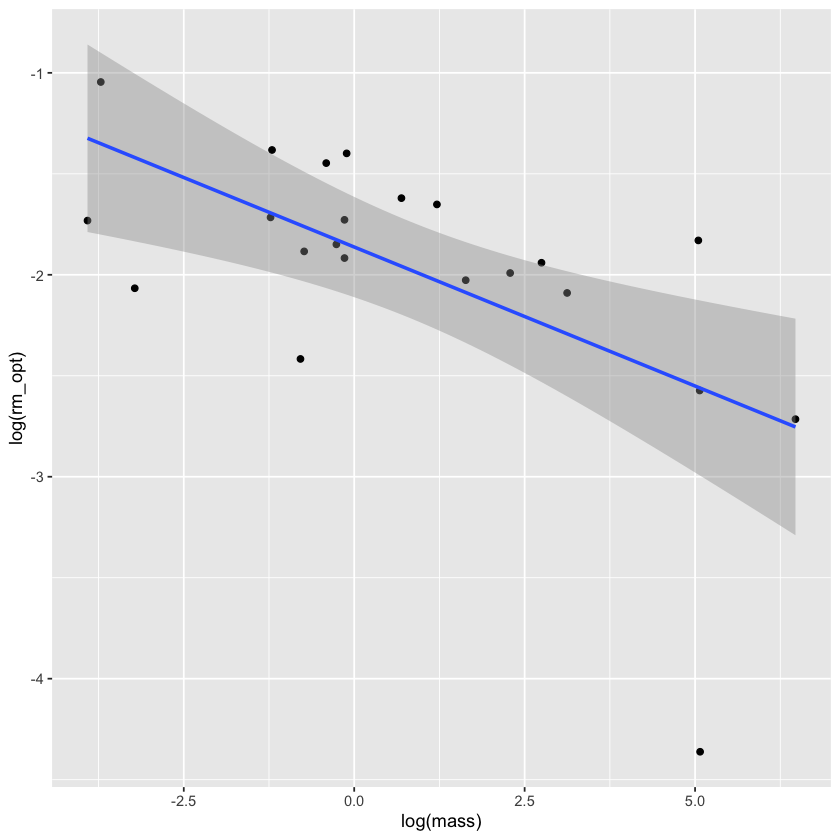


Call:
lm(formula = log(rm_opt) ~ log(mass) + kT, data = rm_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.63548 -0.07988  0.10182  0.23301  0.51757 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.74166   11.69194   2.031 0.056529 .  
log(mass)   -0.14962    0.03756  -3.983 0.000796 ***
kT          -0.66712    0.30462  -2.190 0.041204 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4929 on 19 degrees of freedom
Multiple R-squared:  0.4936,	Adjusted R-squared:  0.4403 
F-statistic: 9.259 on 2 and 19 DF,  p-value: 0.001559


(Intercept)   log(mass)          kT 
 23.7416577  -0.1496173  -0.6671157

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mass),1,3.334176,3.3341760,13.72158,0.001505041
kT,1,1.165384,1.1653841,4.79606,0.041203555
Residuals,19,4.616768,0.2429878,NA,NA


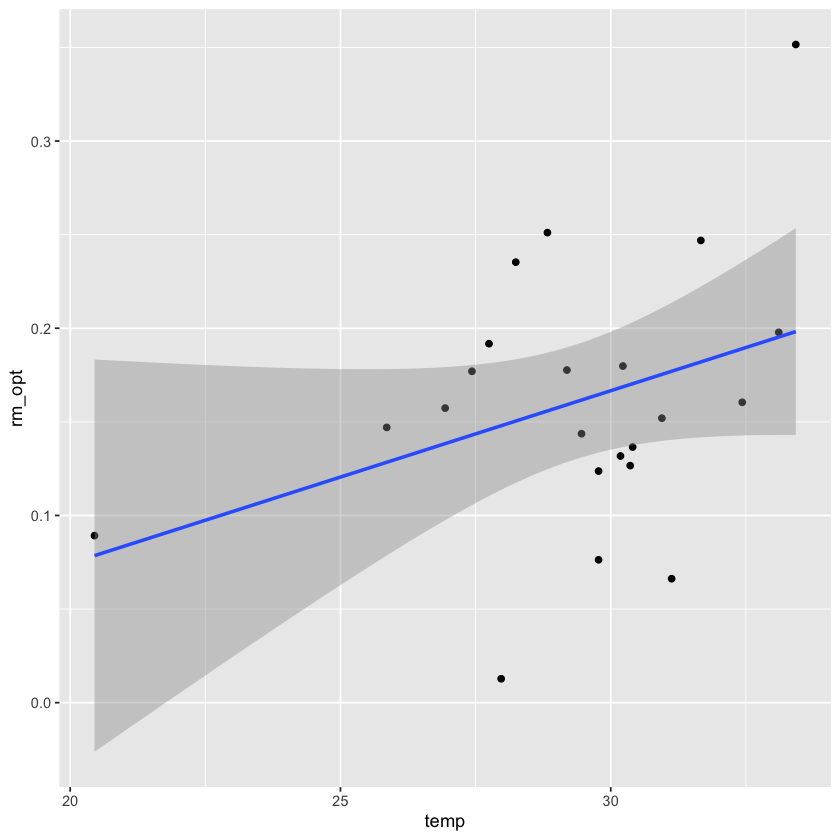

In [38]:
rm_data <- read_csv('../results/rm_optSizeScaling.csv') %>% 
  group_by(species) %>% 
  slice(which.max(rm_opt)) %>%
  arrange(curve_ID)

rm_data

rm_data$kT <- 1/(8.617333262145 * 10^-5 * (rm_data$temp+273.15))

#plot uncorrected data in log-log scale
rm_data %>%
  ggplot(aes(x=log(mass), y = log(rm_opt)))+
  geom_point()+
  geom_smooth(method = 'lm')

#plot rm_opt vs T
rm_data %>%
  ggplot(aes(x = temp, y = rm_opt)) +
  geom_point()+
  geom_smooth(method = 'lm')

#linear model (note the allometry is linear in log-log scale)
rm_model <- lm(log(rm_opt) ~ log(mass) + kT, data = rm_data)
summary(rm_model)
coef(rm_model)

save(rm_model,file= "../results/rm_MTE_model.Rdata")

cf <-  confint(rm_model,level = .95)
anova(rm_model)

In [39]:
rm_lm <- lm(log(rm_opt/mass^coef(rm_model)[2]) ~ temp, data = rm_data)
summary(rm_lm)
confint(rm_lm, level=.95)


Call:
lm(formula = log(rm_opt/mass^coef(rm_model)[2]) ~ temp, data = rm_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.63211 -0.08609  0.09752  0.23197  0.51999 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.37423    1.11108  -3.937 0.000815 ***
temp         0.08592    0.03770   2.279 0.033791 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4801 on 20 degrees of freedom
Multiple R-squared:  0.2061,	Adjusted R-squared:  0.1664 
F-statistic: 5.193 on 1 and 20 DF,  p-value: 0.03379


,2.5 %,97.5 %
(Intercept),-6.691905706,-2.0565620
temp,0.007274544,0.1645751


## Check for 'hotter-is-better' pattern without outlier

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


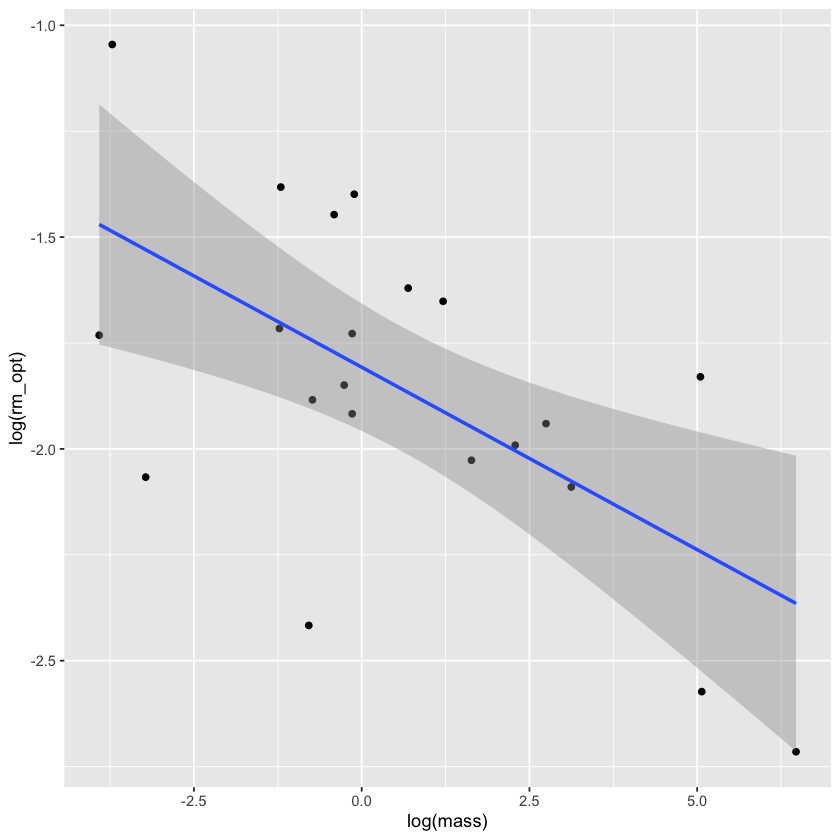


Call:
lm(formula = log(rm_opt) ~ log(mass) + kT, data = rm_data_b)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64185 -0.13419  0.02377  0.14725  0.38243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.60211    6.66457   2.491 0.022724 *  
log(mass)   -0.09817    0.02256  -4.352 0.000384 ***
kT          -0.47975    0.17367  -2.762 0.012829 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2771 on 18 degrees of freedom
Multiple R-squared:  0.5587,	Adjusted R-squared:  0.5096 
F-statistic: 11.39 on 2 and 18 DF,  p-value: 0.0006353


(Intercept)   log(mass)          kT 
16.60211327 -0.09816506 -0.47974895

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mass),1,3.334176,3.3341760,13.72158,0.001505041
kT,1,1.165384,1.1653841,4.79606,0.041203555
Residuals,19,4.616768,0.2429878,NA,NA


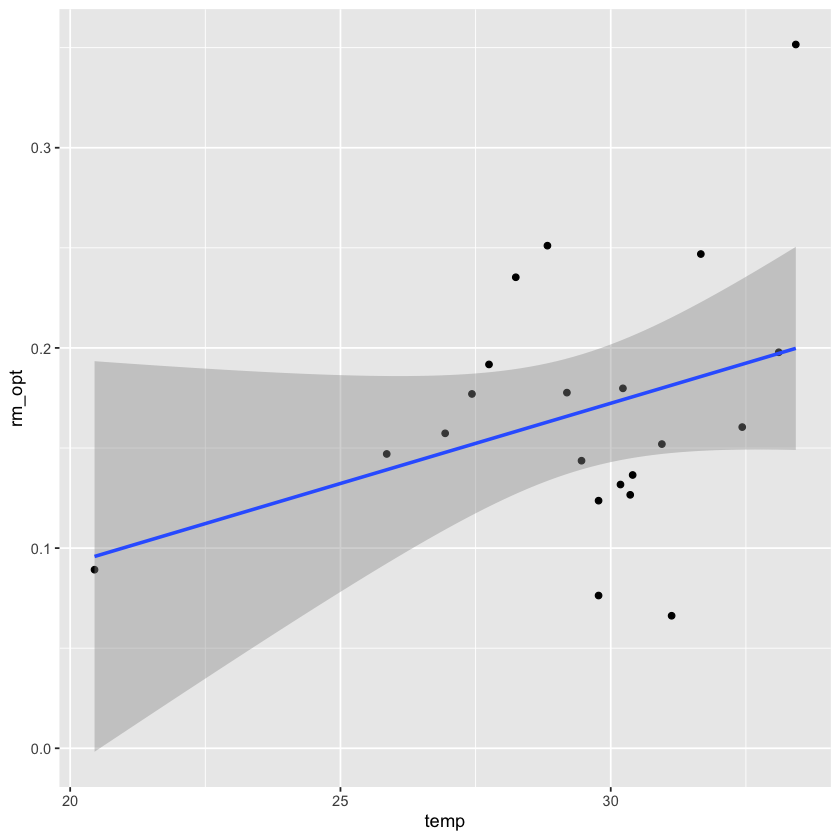

In [40]:
rm_data_b <- rm_data %>% filter(species != 'Anoplophora glabripennis') # remove outlier from regression

#plot uncorrected data in log-log scale
rm_data_b %>%
  ggplot(aes(x=log(mass), y = log(rm_opt)))+
  geom_point()+
  geom_smooth(method = 'lm')

#plot rm_opt vs T
rm_data_b %>%
  ggplot(aes(x = temp, y = rm_opt)) +
  geom_point()+
  geom_smooth(method = 'lm')

# linear model (note the allometry is linear in log-log scale)
rm_model_b <- lm(log(rm_opt) ~ log(mass) + kT, data = rm_data_b)
summary(rm_model_b)
coef(rm_model_b)

save(rm_model_b,file= "../results/rm_MTE_model_b.Rdata")

cf <-  confint(rm_model,level = .95)
anova(rm_model)

In [41]:
rm_lm_b <- lm(log(rm_opt/mass^coef(rm_model_b)[2]) ~ temp, data = rm_data_b)
summary(rm_lm_b)
confint(rm_lm_b, level=.95)


Call:
lm(formula = log(rm_opt/mass^coef(rm_model_b)[2]) ~ temp, data = rm_data_b)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64117 -0.14280  0.01994  0.14271  0.38455 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.60977    0.62998  -5.730  1.6e-05 ***
temp         0.06154    0.02133   2.885  0.00948 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2699 on 19 degrees of freedom
Multiple R-squared:  0.3047,	Adjusted R-squared:  0.2681 
F-statistic: 8.325 on 1 and 19 DF,  p-value: 0.00948


,2.5 %,97.5 %
(Intercept),-4.92833414,-2.2912006
temp,0.01689723,0.1061785


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text()`).”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


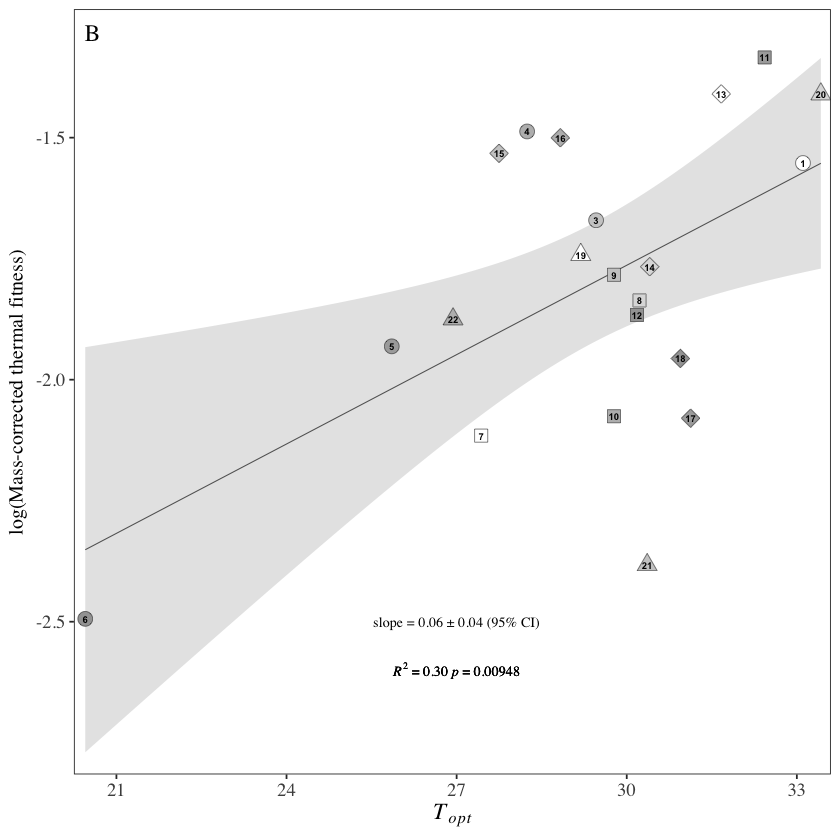

In [42]:
rm_plot_data <- rm_data %>% 
  mutate(description = 
           case_when(curve_ID == "3" ~ "(1) Aedes aegypti",
                     curve_ID == "1" ~ "(2) Anoplophora glabripennis",
                     curve_ID == "4" ~ "(3) Anthonomus grandis",
                     curve_ID == "6" ~ "(4) Aphis gossypii",
                     curve_ID == "12" ~ "(5) Aphis nasturtii",
                     curve_ID == "22" ~ "(6) Aulacorthum solani",
                     curve_ID == "20" ~ "(7) Bemisia argentifolii",
                     curve_ID == "7" ~ "(8) Bemisia tabaci",             
                     curve_ID == "21" ~ "(9) Dactylopius austrinus",      
                     curve_ID == "2" ~ "(10) Halyomorpha halys",          
                     curve_ID == "15" ~ "(11) Helicoverpa armigera",       
                     curve_ID == "17" ~ "(12) Hyperaspis notata",          
                     curve_ID == "11" ~ "(13) Muscidifurax zaraptor",      
                     curve_ID == "19" ~ "(14) Ophraella communa",          
                     curve_ID == "5" ~ "(15) Paracoccus marginatus",      
                     curve_ID == "13" ~ "(16) Rhopalosiphum maidis",       
                     curve_ID == "16" ~  "(17) Scapsipedus icipe",          
                     curve_ID == "9" ~ "(18) Stethorus punctillum",       
                     curve_ID == "8" ~ "(19) Tetraneura nigriabdominalis",
                     curve_ID == "10" ~ "(20) Tetranychus mcdanieli",      
                     curve_ID == "14" ~ "(21) Thrips hawaiiensis",         
                     curve_ID == "18"~ "(22) Toxoptera citricida")) %>%
  mutate(description = 
           factor(description, 
                  levels = c("(1) Aedes aegypti",
                             "(2) Anoplophora glabripennis",  
                             "(3) Anthonomus grandis",         
                             "(4) Aphis gossypii",             
                             "(5) Aphis nasturtii",            
                             "(6) Aulacorthum solani",         
                             "(7) Bemisia argentifolii",       
                             "(8) Bemisia tabaci",             
                             "(9) Dactylopius austrinus",      
                             "(10) Halyomorpha halys",          
                             "(11) Helicoverpa armigera",       
                             "(12) Hyperaspis notata",          
                             "(13) Muscidifurax zaraptor",      
                             "(14) Ophraella communa",          
                             "(15) Paracoccus marginatus",      
                             "(16) Rhopalosiphum maidis",       
                             "(17) Scapsipedus icipe",          
                             "(18) Stethorus punctillum",       
                             "(19) Tetraneura nigriabdominalis",
                             "(20) Tetranychus mcdanieli",      
                             "(21) Thrips hawaiiensis",         
                             "(22) Toxoptera citricida"))) %>%
  arrange(description)


lbs  <- c(bquote(plain(paste("1. ",italic("Aedes aegypti")))),
                 bquote(plain(paste("2. ",italic("Anoplophora glabripennis")))),
                 bquote(plain(paste("3. ",italic("Anthonomus grandis")))),
                 bquote(plain(paste("4. ",italic("Aphis gossypii")))),
                 bquote(plain(paste("5. ",italic("Aphis nasturtii")))),
                 bquote(plain(paste("6. ",italic("Aulacorthum solani")))),
                 bquote(plain(paste("7. ",italic("Bemisia argentifolii")))),
                 bquote(plain(paste("8. ",italic("Bemisia tabaci")))),
                 bquote(plain(paste("9. ",italic("Dactylopius austrinus")))),
                 bquote(plain(paste("10. ",italic("Halyomorpha halys")))),
                 bquote(plain(paste("11. ",italic("Helicoverpa armigera")))),
                 bquote(plain(paste("12. ",italic("Hyperaspis notata")))),
                 bquote(plain(paste("13. ",italic("Muscidifurax zaraptor")))),
                 bquote(plain(paste("14. ",italic("Ophraella communa")))),
                 bquote(plain(paste("15. ",italic("Paracoccus marginatus")))),
                 bquote(plain(paste("16. ",italic("Rhopalosiphum maidis")))),
                 bquote(plain(paste("17. ",italic("Scapsipedus icipe")))),
                 bquote(plain(paste("18. ",italic("Stethorus punctillum")))),
                 bquote(plain(paste("19. ",italic("Tetraneura nigriabdominalis")))),
                 bquote(plain(paste("20. ",italic("Tetranychus mcdanieli")))),
                 bquote(plain(paste("21. ",italic("Thrips hawaiiensis")))),
                 bquote(plain(paste("22. ",italic("Toxoptera citricida")))))
       
#plot rm_opt in 1/kT, correcting for mass (outlier excluded)
MassCorr_rm_opt <- 
  ggplot()+
  geom_smooth(aes(x = temp, y = log(rm_opt/mass^coef(rm_model_b)[2])), rm_data_b, 
              method = 'lm', colour = '#636363', linewidth=0.3, fill="gray") +
  scale_y_continuous(expression(plain(paste("log(Mass-corrected thermal fitness)"))),
                     limits=c(-2.8,-1.25),
                     expand = c(0.01, 0),
                     breaks=seq(-2.5,-1.5, by=0.5))+
  scale_x_continuous(expression(paste(italic(T[opt]))),
                     limits=c(20.25,33.6),
                     expand = c(0, 0),
                     breaks=seq(21,33, by=3))+
  geom_point(aes(x = temp, y = log(rm_opt/mass^coef(rm_model_b)[2]),shape = description, fill = description), 
             rm_plot_data, size=4,stroke=0.25, col='#333333')+
  scale_shape_manual(values = c(21,21,21,21,21,21,
                                22,22,22,22,22,22,
                                23,23,23,23,23,23,
                                24,24,24,24),
                     labels = lbs,
                     name=expression(bold("")),
                     guide = guide_legend(nrow=11,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#FFFFFF","#DDDDDD","#CCCCCC","#BBBBBB",'#AAAAAA',"#A3A3A3",
                               "#FFFFFF","#DDDDDD","#CCCCCC","#BBBBBB",'#AAAAAA',"#A3A3A3",
                               "#FFFFFF","#DDDDDD","#CCCCCC","#BBBBBB",'#AAAAAA',"#A3A3A3",
                               "#FFFFFF", "#DDDDDD","#CCCCCC","#BBBBBB"),
                    labels = lbs,
                    name=expression(bold("")),
                    guide = guide_legend(nrow=11,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333"),
                      labels = lbs,
                      name=expression(bold("")),
                      guide = guide_legend(nrow=11,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  geom_text(aes(label = c(1:22), 
            x = temp, y = log(rm_opt/mass^coef(rm_model_b)[2])), rm_plot_data,
            size = 2, color = 'black', fontface = 'bold')+
  theme_bw()+
  theme(text = element_text(size=14, family = 'Times'),
        legend.position = 'none',
        legend.text = element_text(size = 4.5),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.2, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.7, vjust=2, family='Times',
                label = "B"), size = 5, colour = "black")+
  theme(axis.title.y = element_text(size = 12))+
  annotate("text", x = 27, y = -2.6, label = italic("R")^2~"= 0.30"~italic("p")~"= 0.00948", size=3, family='Times')+
  annotate("text", x = 27, y = -2.5, label = "slope = 0.06 ± 0.04 (95% CI)", size=3, family='Times')
 
MassCorr_rm_opt


# Analyses of $r_m$ vs distribution of trait $T_{pk}$s

#### Relationship of $r_{m,opt}$ vs distribution of trait $T_{pk}$'s

In [43]:
# Sum of trait Tpks versus mass corrected r_m, opt

Species <- rm_data$species

alphaTpks <- as_tibble(read.csv('../data/alpha_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), conf_upper = as.numeric(conf_upper))

zjTpks <- as_tibble(read.csv('../data/zj_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))


zTpks <- as_tibble(read.csv('../data/z_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))

bmaxTpks <- as_tibble(read.csv('../data/bmax_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))

AllTpks <- bind_rows(alphaTpks,zjTpks,zTpks,bmaxTpks)

head(AllTpks)

# write_csv(AllTpks, '../results/AllTpkParams.csv')

param,species,estimate,conf_lower,conf_upper,trait
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
topt,Tetraneura nigriabdominalis,30.648,30.51723,30.78992,juvenile development rate
topt,Stethorus punctillum,32.875,32.78152,33.01626,juvenile development rate
topt,Tetranychus mcdanieli,35.182,34.89144,35.70428,juvenile development rate
topt,Muscidifurax zaraptor,32.038,31.87015,32.66561,juvenile development rate
topt,Aphis nasturtii,30.874,29.76652,31.81278,juvenile development rate
topt,Rhopalosiphum maidis,27.926,27.34118,28.51675,juvenile development rate


In [44]:
load("../results/rm_MTE_model.Rdata") # Load linear model fitted in previous step (04_rmCalcs)

In [45]:
#prepare data for plotting
rm_data <- rm_data %>% 
           mutate(rm_massCor = rm_opt/mass^coef(rm_model)[2])
         
#Calculate variance and Sum

OptVar <- AllTpks %>% group_by(species) %>%
  summarise(variance = var(estimate))
OptSum <- AllTpks %>% group_by(species) %>%
  summarise(sum = sum(estimate))

In [46]:
PlotData <- left_join(rm_data, OptVar, by="species")
PlotData <- left_join(PlotData, OptSum, by="species")
head(PlotData)

head(PlotData)

PlotData <- PlotData %>%
  mutate(description = 
           case_when(curve_ID == "3" ~ "(1) Aedes aegypti",
                     curve_ID == "1" ~ "(2) Anoplophora glabripennis",
                     curve_ID == "4" ~ "(3) Anthonomus grandis",
                     curve_ID == "6" ~ "(4) Aphis gossypii",
                     curve_ID == "12" ~ "(5) Aphis nasturtii",
                     curve_ID == "22" ~ "(6) Aulacorthum solani",
                     curve_ID == "20" ~ "(7) Bemisia argentifolii",
                     curve_ID == "7" ~ "(8) Bemisia tabaci",             
                     curve_ID == "21" ~ "(9) Dactylopius austrinus",      
                     curve_ID == "2" ~ "(10) Halyomorpha halys",          
                     curve_ID == "15" ~ "(11) Helicoverpa armigera",       
                     curve_ID == "17" ~ "(12) Hyperaspis notata",          
                     curve_ID == "11" ~ "(13) Muscidifurax zaraptor",      
                     curve_ID == "19" ~ "(14) Ophraella communa",          
                     curve_ID == "5" ~ "(15) Paracoccus marginatus",      
                     curve_ID == "13" ~ "(16) Rhopalosiphum maidis",       
                     curve_ID == "16" ~  "(17) Scapsipedus icipe",          
                     curve_ID == "9" ~ "(18) Stethorus punctillum",       
                     curve_ID == "8" ~ "(19) Tetraneura nigriabdominalis",
                     curve_ID == "10" ~ "(20) Tetranychus mcdanieli",      
                     curve_ID == "14" ~ "(21) Thrips hawaiiensis",         
                     curve_ID == "18"~ "(22) Toxoptera citricida")) %>%
  mutate(description = 
           factor(description, 
                  levels = c("(1) Aedes aegypti",
                             "(2) Anoplophora glabripennis",  
                             "(3) Anthonomus grandis",         
                             "(4) Aphis gossypii",             
                             "(5) Aphis nasturtii",            
                             "(6) Aulacorthum solani",         
                             "(7) Bemisia argentifolii",       
                             "(8) Bemisia tabaci",             
                             "(9) Dactylopius austrinus",      
                             "(10) Halyomorpha halys",          
                             "(11) Helicoverpa armigera",       
                             "(12) Hyperaspis notata",          
                             "(13) Muscidifurax zaraptor",      
                             "(14) Ophraella communa",          
                             "(15) Paracoccus marginatus",      
                             "(16) Rhopalosiphum maidis",       
                             "(17) Scapsipedus icipe",          
                             "(18) Stethorus punctillum",       
                             "(19) Tetraneura nigriabdominalis",
                             "(20) Tetranychus mcdanieli",      
                             "(21) Thrips hawaiiensis",         
                             "(22) Toxoptera citricida"))) %>%
  arrange(description)

levels(PlotData$description)

lbs  <- c(bquote(plain(paste("1. ",italic("Aedes aegypti")))),
              bquote(plain(paste("2. ",italic("Anoplophora glabripennis")))),
              bquote(plain(paste("3. ",italic("Anthonomus grandis")))),
              bquote(plain(paste("4. ",italic("Aphis gossypii")))),
              bquote(plain(paste("5. ",italic("Aphis nasturtii")))),
              bquote(plain(paste("6. ",italic("Aulacorthum solani")))),
              bquote(plain(paste("7. ",italic("Bemisia argentifolii")))),
              bquote(plain(paste("8. ",italic("Bemisia tabaci")))),
              bquote(plain(paste("9. ",italic("Dactylopius austrinus")))),
              bquote(plain(paste("10. ",italic("Halyomorpha halys")))),
              bquote(plain(paste("11. ",italic("Helicoverpa armigera")))),
              bquote(plain(paste("12. ",italic("Hyperaspis notata")))),
              bquote(plain(paste("13. ",italic("Muscidifurax zaraptor")))),
              bquote(plain(paste("14. ",italic("Ophraella communa")))),
              bquote(plain(paste("15. ",italic("Paracoccus marginatus")))),
              bquote(plain(paste("16. ",italic("Rhopalosiphum maidis")))),
              bquote(plain(paste("17. ",italic("Scapsipedus icipe")))),
              bquote(plain(paste("18. ",italic("Stethorus punctillum")))),
              bquote(plain(paste("19. ",italic("Tetraneura nigriabdominalis")))),
              bquote(plain(paste("20. ",italic("Tetranychus mcdanieli")))),
              bquote(plain(paste("21. ",italic("Thrips hawaiiensis")))),
              bquote(plain(paste("22. ",italic("Toxoptera citricida")))))

write_csv(PlotData,'../results/rm_optSizeScaling_w_tpksums.csv')

species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,⋯,zjUpr,kappa,rm_opt,rm_optLwr,rm_optUpr,mass,kT,rm_massCor,variance,sum
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.97297,297.190161,316.589257,275.438861,1,3.279634,2.502936,4.185761,0.01833954,⋯,0.001402478,0.01,0.0127539,0.01050471,0.01501273,159.8000000,38.53747,0.0272481,60.45173,90.701
Halyomorpha halys,29.77477,29.803247,35.147055,26.738998,2,6.254051,4.571432,7.953408,0.01385860,⋯,0.002917899,0.01,0.0763076,0.06770028,0.08018689,158.8100000,38.30825,0.1628761,43.70191,109.156
Aedes aegypti,33.10811,5.430507,6.139773,4.974288,3,8.966715,6.913063,10.160802,0.04764627,⋯,0.076836527,0.01,0.1978135,0.18504167,0.19297752,1.9991667,37.89130,0.2194160,78.98463,108.436
Anthonomus grandis,29.45946,11.006110,13.270318,9.919390,4,6.292496,5.369757,10.030917,0.04069540,⋯,0.034215172,0.01,0.1436557,0.13334613,0.15805344,15.6000000,38.34817,0.2166881,92.71248,90.858
Paracoccus marginatus,27.74775,11.249195,14.346792,9.138949,5,14.925416,10.285558,45.486877,0.05028942,⋯,0.012891693,0.01,0.1917489,0.16424916,0.24402898,3.3650000,38.56632,0.2299211,39.66024,84.752
Aphis gossypii,28.24324,4.573511,4.799221,4.398614,6,3.206500,2.552281,3.740294,0.12279223,⋯,0.061785550,0.01,0.2352995,0.20580818,0.25404828,0.6633333,38.50291,0.2212835,67.62298,87.435


species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,⋯,zjUpr,kappa,rm_opt,rm_optLwr,rm_optUpr,mass,kT,rm_massCor,variance,sum
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.97297,297.190161,316.589257,275.438861,1,3.279634,2.502936,4.185761,0.01833954,⋯,0.001402478,0.01,0.0127539,0.01050471,0.01501273,159.8000000,38.53747,0.0272481,60.45173,90.701
Halyomorpha halys,29.77477,29.803247,35.147055,26.738998,2,6.254051,4.571432,7.953408,0.01385860,⋯,0.002917899,0.01,0.0763076,0.06770028,0.08018689,158.8100000,38.30825,0.1628761,43.70191,109.156
Aedes aegypti,33.10811,5.430507,6.139773,4.974288,3,8.966715,6.913063,10.160802,0.04764627,⋯,0.076836527,0.01,0.1978135,0.18504167,0.19297752,1.9991667,37.89130,0.2194160,78.98463,108.436
Anthonomus grandis,29.45946,11.006110,13.270318,9.919390,4,6.292496,5.369757,10.030917,0.04069540,⋯,0.034215172,0.01,0.1436557,0.13334613,0.15805344,15.6000000,38.34817,0.2166881,92.71248,90.858
Paracoccus marginatus,27.74775,11.249195,14.346792,9.138949,5,14.925416,10.285558,45.486877,0.05028942,⋯,0.012891693,0.01,0.1917489,0.16424916,0.24402898,3.3650000,38.56632,0.2299211,39.66024,84.752
Aphis gossypii,28.24324,4.573511,4.799221,4.398614,6,3.206500,2.552281,3.740294,0.12279223,⋯,0.061785550,0.01,0.2352995,0.20580818,0.25404828,0.6633333,38.50291,0.2212835,67.62298,87.435


[1] "(1) Aedes aegypti"                "(2) Anoplophora glabripennis"    
 [3] "(3) Anthonomus grandis"           "(4) Aphis gossypii"              
 [5] "(5) Aphis nasturtii"              "(6) Aulacorthum solani"          
 [7] "(7) Bemisia argentifolii"         "(8) Bemisia tabaci"              
 [9] "(9) Dactylopius austrinus"        "(10) Halyomorpha halys"          
[11] "(11) Helicoverpa armigera"        "(12) Hyperaspis notata"          
[13] "(13) Muscidifurax zaraptor"       "(14) Ophraella communa"          
[15] "(15) Paracoccus marginatus"       "(16) Rhopalosiphum maidis"       
[17] "(17) Scapsipedus icipe"           "(18) Stethorus punctillum"       
[19] "(19) Tetraneura nigriabdominalis" "(20) Tetranychus mcdanieli"      
[21] "(21) Thrips hawaiiensis"          "(22) Toxoptera citricida"

In [47]:
# load simulaion results, filtering by only r_opt values of rows with predicted optimal order of T_pk's 

sim_results_opt <- read.csv("../results/sim_results.csv") %>% filter(Opt_T_pk_order == 1) 

sim_results_notopt <- read.csv("../results/sim_results.csv") %>% filter(Opt_T_pk_order == 0) 

head(sim_results_opt)

,T_pk_sums,T_pk_vars,r_m_opt,T_opt,Opt_T_pk_order
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,81.53854,103.71849,0.07250142,16.05,1
2,65.22241,114.33503,-0.01005402,10.30,1
3,84.72659,138.90059,0.03974080,13.45,1
4,80.22064,113.52081,0.05692468,14.55,1
5,61.86317,97.56244,0.04888265,13.70,1
6,91.28361,88.64286,0.12810141,19.20,1


## $r_m$ vs sum of trait  $T_{pk}$s

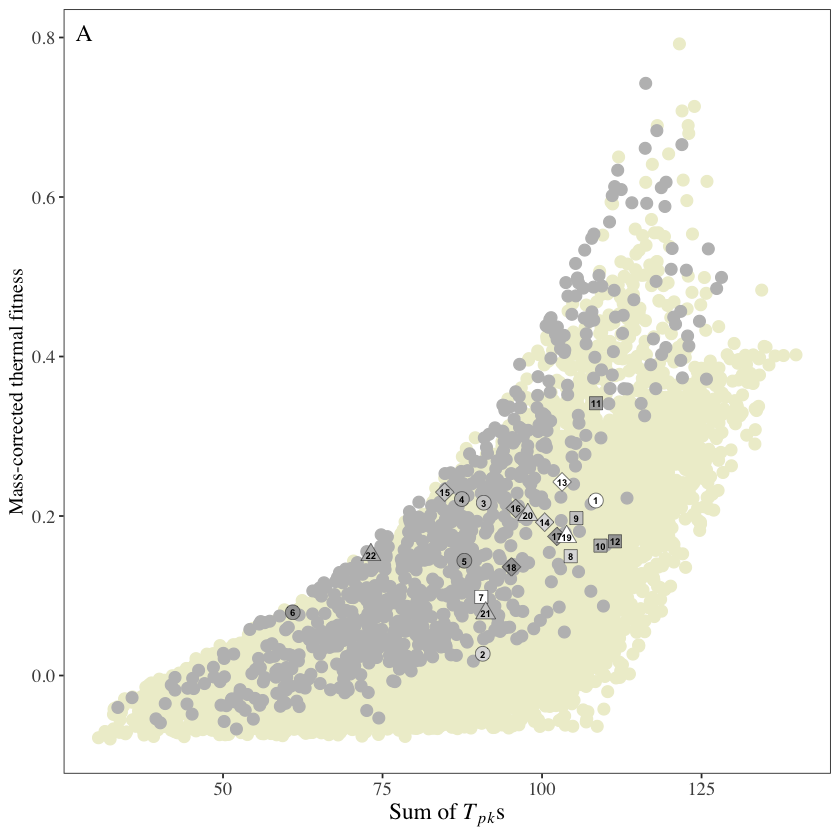

In [48]:
SumTpks_plot <- ggplot() +
  geom_point(data = sim_results_notopt, aes(x = T_pk_sums, y = r_m_opt), color="lightyellow2", size = 3) +
  geom_point(data = sim_results_opt, aes(x = T_pk_sums, y = r_m_opt), color="gray", size = 3)+
  geom_point(data = PlotData, aes(x = sum, y = rm_massCor, shape=description, fill=description), 
             size=4, stroke=0.25,col='#333333')+ 
  scale_y_continuous(expression(plain(paste("Mass-corrected thermal fitness"))))+
  scale_x_continuous(expression(plain(paste("Sum of ",italic("T"[pk]),"s")))) +
  theme_bw()+
  theme(text=element_text(family="Times")) + 
  scale_shape_manual(values = c(21,21,21,21,21,21,
                                22,22,22,22,22,22,
                                23,23,23,23,23,23,
                                24,24,24,24),
                     labels = lbs,
                     name=expression(bold("")),
                     guide = guide_legend(nrow=11,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#FFFFFF","#DDDDDD","#CCCCCC","#BBBBBB",'#AAAAAA',"#A3A3A3",
                               "#FFFFFF","#DDDDDD","#CCCCCC","#BBBBBB",'#AAAAAA',"#A3A3A3",
                               "#FFFFFF","#DDDDDD","#CCCCCC","#BBBBBB",'#AAAAAA',"#A3A3A3",
                               "#FFFFFF", "#DDDDDD","#CCCCCC","#BBBBBB"),
                    labels = lbs,
                    name=expression(bold("")),
                    guide = guide_legend(nrow=11,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333"),
                      labels = lbs,
                      name=expression(bold("")),
                      guide = guide_legend(nrow=11,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  geom_text(aes(label = seq(1:22), x = sum, y = rm_massCor),PlotData, 
            size = 2, color = '#000000', fontface = 'bold')+
  theme(text = element_text(size=14),
        legend.position = 'none',
        legend.text = element_text(size = 4.5, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'))+
  theme(panel.grid.minor = element_blank(),
        panel.grid.major = element_blank())+
  theme(axis.title.y = element_text(size=12))+
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.7, vjust=2, family='Times',
                label = "A"), size = 5, colour = "black")

SumTpks_plot


## Relationship between $r_{m,opt}$ and $T_{pk}$ of (mass-corrected) $\alpha$ 

In [49]:
# Create argument containing target species
spps <- "case_when(species == 'Anoplophora glabripennis' ~ '1', 
        species == 'Halyomorpha halys' ~ '2', 
        species == 'Aedes aegypti' ~ '3',
        species == 'Anthonomus grandis' ~ '4',
        species == 'Paracoccus marginatus' ~ '5',
        species == 'Aphis gossypii' ~ '6',
        species == 'Bemisia tabaci' ~ '7',
        species == 'Tetraneura nigriabdominalis' ~ '8',
        species == 'Stethorus punctillum' ~ '9',
        species == 'Tetranychus mcdanieli' ~ '10',
        species == 'Muscidifurax zaraptor' ~ '11',
        species == 'Aphis nasturtii' ~ '12',
        species == 'Rhopalosiphum maidis' ~ '13',
        species == 'Thrips hawaiiensis' ~ '14',
        species == 'Helicoverpa armigera' ~ '15',
        species == 'Scapsipedus icipe' ~ '16',
        species == 'Hyperaspis notata' ~ '17',
        species == 'Toxoptera citricida' ~ '18',
        species == 'Ophraella communa' ~ '19',
        species == 'Bemisia argentifolii' ~ '20',
        species == 'Dactylopius austrinus' ~ '21',
        species == 'Aulacorthum solani' ~ '22')"

# Read in the trait data
alphaMass <- as_tibble(read.csv('../data/a_pksT_pksMass.csv')) %>% 
  select(species, a_pk, a_pkLwr, a_pkUpr) %>%
  filter(species == 'Anoplophora glabripennis' |
           species == 'Halyomorpha halys' |
           species == 'Aedes aegypti'|
           species == 'Anthonomus grandis' |
           species == 'Paracoccus marginatus' |
           species == 'Aphis gossypii' |
           species == 'Bemisia tabaci' |
           species == 'Tetraneura nigriabdominalis' |
           species == 'Stethorus punctillum' |
           species == 'Tetranychus mcdanieli' |
           species == 'Muscidifurax zaraptor' |
           species == 'Aphis nasturtii' |
           species == 'Rhopalosiphum maidis' |
           species == 'Thrips hawaiiensis' |
           species == 'Helicoverpa armigera' |
           species == 'Scapsipedus icipe' |
           species == 'Hyperaspis notata' |
           species == 'Toxoptera citricida'|
           species == 'Ophraella communa' |
           species == 'Bemisia argentifolii'|
           species == 'Dactylopius austrinus'|
           species == 'Aulacorthum solani') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  mutate(curve_ID = as.numeric(curve_ID)) %>%
  arrange(curve_ID)

alphaMass

alpharm_data <- inner_join(rm_data, alphaMass)
alpharm_data

species,a_pk,a_pkLwr,a_pkUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,0.003406889,0.003287747,0.004151901,1
Halyomorpha halys,0.044334972,0.037110534,0.052555003,2
Aedes aegypti,0.199835786,0.177338682,0.218005861,3
Anthonomus grandis,0.118202637,0.101758189,0.148880707,4
Paracoccus marginatus,0.091667630,0.073527267,0.135763697,5
Aphis gossypii,0.221659340,0.208015497,0.229455901,6
Bemisia tabaci,0.082825022,0.079432710,0.094269173,7
Tetraneura nigriabdominalis,0.117949376,0.116868649,0.118895585,8
Stethorus punctillum,0.152817553,0.144131053,0.165311673,9


Joining with `by = join_by(species, curve_ID)`


species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,⋯,kappa,rm_opt,rm_optLwr,rm_optUpr,mass,kT,rm_massCor,a_pk,a_pkLwr,a_pkUpr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.97297,297.190161,316.589257,275.438861,1,3.279634,2.502936,4.185761,0.01833954,⋯,0.01,0.01275390,1.050471e-02,0.01501273,159.8000000,38.53747,0.02724810,0.003406889,0.003287747,0.004151901
Halyomorpha halys,29.77477,29.803247,35.147055,26.738998,2,6.254051,4.571432,7.953408,0.01385860,⋯,0.01,0.07630760,6.770028e-02,0.08018689,158.8100000,38.30825,0.16287606,0.044334972,0.037110534,0.052555003
Aedes aegypti,33.10811,5.430507,6.139773,4.974288,3,8.966715,6.913063,10.160802,0.04764627,⋯,0.01,0.19781352,1.850417e-01,0.19297752,1.9991667,37.89130,0.21941596,0.199835786,0.177338682,0.218005861
Anthonomus grandis,29.45946,11.006110,13.270318,9.919390,4,6.292496,5.369757,10.030917,0.04069540,⋯,0.01,0.14365573,1.333461e-01,0.15805344,15.6000000,38.34817,0.21668811,0.118202637,0.101758189,0.148880707
Paracoccus marginatus,27.74775,11.249195,14.346792,9.138949,5,14.925416,10.285558,45.486877,0.05028942,⋯,0.01,0.19174885,1.642492e-01,0.24402898,3.3650000,38.56632,0.22992112,0.091667630,0.073527267,0.135763697
Aphis gossypii,28.24324,4.573511,4.799221,4.398614,6,3.206500,2.552281,3.740294,0.12279223,⋯,0.01,0.23529948,2.058082e-01,0.25404828,0.6633333,38.50291,0.22128346,0.221659340,0.208015497,0.229455901
Bemisia tabaci,30.22523,12.226305,13.061690,10.742313,7,9.793602,7.520674,11.794230,0.06851774,⋯,0.01,0.17981067,1.612936e-01,0.19739044,0.2931250,38.25137,0.14965021,0.082825022,0.079432710,0.094269173
Tetraneura nigriabdominalis,29.18919,8.639694,8.704294,8.580309,8,3.037762,2.606394,3.839115,0.08826039,⋯,0.01,0.17766166,1.704250e-01,0.18837408,0.8673000,38.38245,0.17391730,0.117949376,0.116868649,0.118895585
Stethorus punctillum,30.94595,7.449749,7.965410,7.036821,9,6.478403,4.881562,8.662371,0.03427692,⋯,0.01,0.15195914,1.522272e-01,0.15006184,0.4800000,38.16071,0.13615544,0.152817553,0.144131053,0.165311673


In [50]:
# linear model (note the allometry is linear in log-log scale)
alpharm_model <- lm(log(rm_opt/mass^-0.1) ~ log(a_pk/mass^-0.27), data = alpharm_data)
summary(alpharm_model)
confint(alpharm_model, level=.95)
anova(alpharm_model)


Call:
lm(formula = log(rm_opt/mass^-0.1) ~ log(a_pk/mass^-0.27), data = alpharm_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7364 -0.2165  0.0251  0.2900  0.6454 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.6467     0.2827  -2.288 0.033178 *  
log(a_pk/mass^-0.27)   0.5731     0.1245   4.602 0.000172 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3827 on 20 degrees of freedom
Multiple R-squared:  0.5143,	Adjusted R-squared:  0.4901 
F-statistic: 21.18 on 1 and 20 DF,  p-value: 0.0001724


,2.5 %,97.5 %
(Intercept),-1.2364239,-0.05704464
log(a_pk/mass^-0.27),0.3133697,0.83291208


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(a_pk/mass^-0.27),1,3.102347,3.1023468,21.18138,0.0001724112
Residuals,20,2.929315,0.1464657,NA,NA


# A tibble: 22 × 2
# Groups:   species [22]
   species                     curve_ID
   <chr>                          <dbl>
 1 Anoplophora glabripennis           1
 2 Halyomorpha halys                  2
 3 Aedes aegypti                      3
 4 Anthonomus grandis                 4
 5 Paracoccus marginatus              5
 6 Aphis gossypii                     6
 7 Bemisia tabaci                     7
 8 Tetraneura nigriabdominalis        8
 9 Stethorus punctillum               9
10 Tetranychus mcdanieli             10
11 Muscidifurax zaraptor             11
12 Aphis nasturtii                   12
13 Rhopalosiphum maidis              13
14 Thrips hawaiiensis                14
15 Helicoverpa armigera              15
16 Scapsipedus icipe                 16
17 Hyperaspis notata                 17
18 Toxoptera citricida               18
19 Ophraella communa                 19
20 Bemisia argentifolii              20
21 Dactylopius austrinus             21
22 Aulacorthum solani               

[1] "(1) Aedes aegypti"                "(2) Anoplophora glabripennis"    
 [3] "(3) Anthonomus grandis"           "(4) Aphis gossypii"              
 [5] "(5) Aphis nasturtii"              "(6) Aulacorthum solani"          
 [7] "(7) Bemisia argentifolii"         "(8) Bemisia tabaci"              
 [9] "(9) Dactylopius austrinus"        "(10) Halyomorpha halys"          
[11] "(11) Helicoverpa armigera"        "(12) Hyperaspis notata"          
[13] "(13) Muscidifurax zaraptor"       "(14) Ophraella communa"          
[15] "(15) Paracoccus marginatus"       "(16) Rhopalosiphum maidis"       
[17] "(17) Scapsipedus icipe"           "(18) Stethorus punctillum"       
[19] "(19) Tetraneura nigriabdominalis" "(20) Tetranychus mcdanieli"      
[21] "(21) Thrips hawaiiensis"          "(22) Toxoptera citricida"

`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


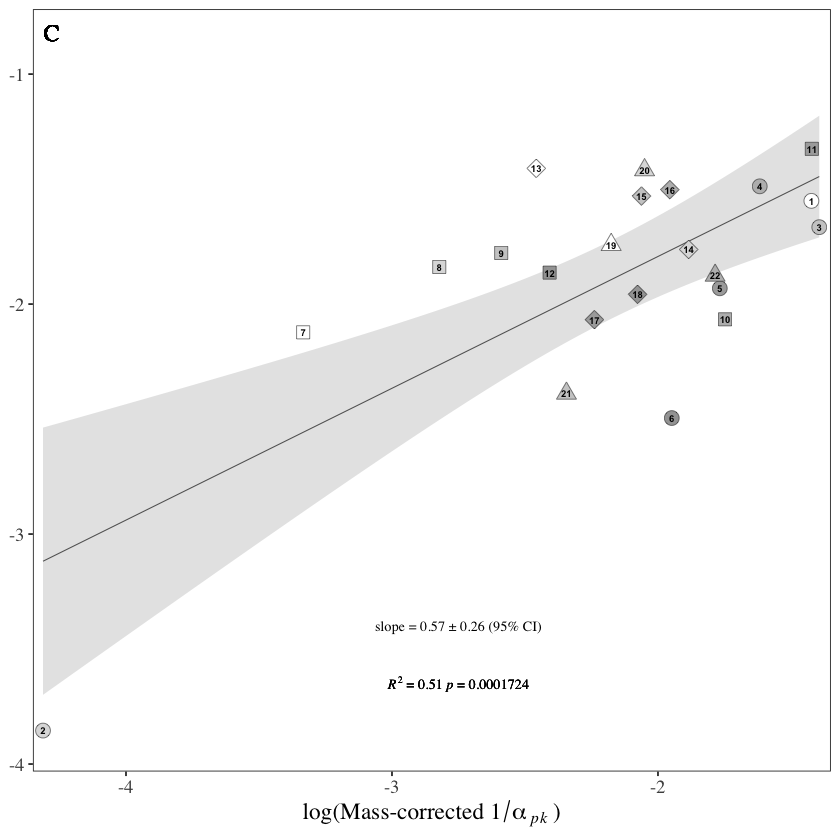

In [51]:
alpharm_data %>% distinct(species, curve_ID) %>% print(n=22)

alpharm_data <- alpharm_data %>%
  mutate(description = 
           case_when(curve_ID == "3" ~ "(1) Aedes aegypti",
                     curve_ID == "1" ~ "(2) Anoplophora glabripennis",
                     curve_ID == "4" ~ "(3) Anthonomus grandis",
                     curve_ID == "6" ~ "(4) Aphis gossypii",
                     curve_ID == "12" ~ "(5) Aphis nasturtii",
                     curve_ID == "22" ~ "(6) Aulacorthum solani",
                     curve_ID == "20" ~ "(7) Bemisia argentifolii",
                     curve_ID == "7" ~ "(8) Bemisia tabaci",             
                     curve_ID == "21" ~ "(9) Dactylopius austrinus",      
                     curve_ID == "2" ~ "(10) Halyomorpha halys",          
                     curve_ID == "15" ~ "(11) Helicoverpa armigera",       
                     curve_ID == "17" ~ "(12) Hyperaspis notata",          
                     curve_ID == "11" ~ "(13) Muscidifurax zaraptor",      
                     curve_ID == "19" ~ "(14) Ophraella communa",          
                     curve_ID == "5" ~ "(15) Paracoccus marginatus",      
                     curve_ID == "13" ~ "(16) Rhopalosiphum maidis",       
                     curve_ID == "16" ~  "(17) Scapsipedus icipe",          
                     curve_ID == "9" ~ "(18) Stethorus punctillum",       
                     curve_ID == "8" ~ "(19) Tetraneura nigriabdominalis",
                     curve_ID == "10" ~ "(20) Tetranychus mcdanieli",      
                     curve_ID == "14" ~ "(21) Thrips hawaiiensis",         
                     curve_ID == "18"~ "(22) Toxoptera citricida")) %>%
  mutate(description = 
           factor(description, 
                  levels = c("(1) Aedes aegypti",
                             "(2) Anoplophora glabripennis",  
                             "(3) Anthonomus grandis",         
                             "(4) Aphis gossypii",             
                             "(5) Aphis nasturtii",            
                             "(6) Aulacorthum solani",         
                             "(7) Bemisia argentifolii",       
                             "(8) Bemisia tabaci",             
                             "(9) Dactylopius austrinus",      
                             "(10) Halyomorpha halys",          
                             "(11) Helicoverpa armigera",       
                             "(12) Hyperaspis notata",          
                             "(13) Muscidifurax zaraptor",      
                             "(14) Ophraella communa",          
                             "(15) Paracoccus marginatus",      
                             "(16) Rhopalosiphum maidis",       
                             "(17) Scapsipedus icipe",          
                             "(18) Stethorus punctillum",       
                             "(19) Tetraneura nigriabdominalis",
                             "(20) Tetranychus mcdanieli",      
                             "(21) Thrips hawaiiensis",         
                             "(22) Toxoptera citricida"))) %>%
                              arrange(description)

levels(alpharm_data$description)

MassCorr_rm_opt_vs_AlphaTpk <-
  alpharm_data %>%
  ggplot(aes(x=log(a_pk/mass^-0.27), y = log(rm_opt/mass^-0.10)))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("ln(",italic(r[m][','][' '][opt])," / ",
                                            italic(M^-0.1),"))"))),
                     limits=c(-4,-0.75),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(plain(paste("log(Mass-corrected ", italic(1/alpha[' '][pk])~")"))),
                     limits=c(-4.35,-1.35),
                     expand = c(0, 0),
                     breaks=seq(-4,-2, by=1))+
  geom_point(aes(shape=description, fill=description), size=4, stroke=0.25, col='#333333')+
  scale_shape_manual(values = c(21,21,21,21,21,21,
                                22,22,22,22,22,22,
                                23,23,23,23,23,23,
                                24,24,24,24),
                     labels = lbs,
                     name=expression(bold("")),
                     guide = guide_legend(nrow=11,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#FFFFFF","#DDDDDD","#CCCCCC","#BBBBBB",'#AAAAAA',"#A3A3A3",
                               "#FFFFFF","#DDDDDD","#CCCCCC","#BBBBBB",'#AAAAAA',"#A3A3A3",
                               "#FFFFFF","#DDDDDD","#CCCCCC","#BBBBBB",'#AAAAAA',"#A3A3A3",
                               "#FFFFFF", "#DDDDDD","#CCCCCC","#BBBBBB"),
                    labels = lbs,
                    name=expression(bold("")),
                    guide = guide_legend(nrow=11,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333"),
                      labels = lbs,
                      name=expression(bold("")),
                      guide = guide_legend(nrow=11,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  geom_text(aes(label = seq(1:22), x=log(a_pk/mass^-0.27), y = log(rm_opt/mass^-0.10)), 
            size = 2, color = '#000000', fontface = 'bold')+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=14),
        legend.text = element_text(size = 9),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.6, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.7, vjust=2, family='Times',
                label = "C"),size = 5, colour = "black")+
  theme(axis.title.y = element_blank(), legend.position = 'none')+
  annotate("text", x = -2.75, y = -3.65, label = italic("R")^2~"= 0.51"~italic("p")~"= 0.0001724", size=3, family='Times')+
  annotate("text", x = -2.75, y = -3.4, label = "slope = 0.57 ± 0.26 (95% CI)", size=3, family='Times')
 
  
MassCorr_rm_opt_vs_AlphaTpk


`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text()`).”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text()`).”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


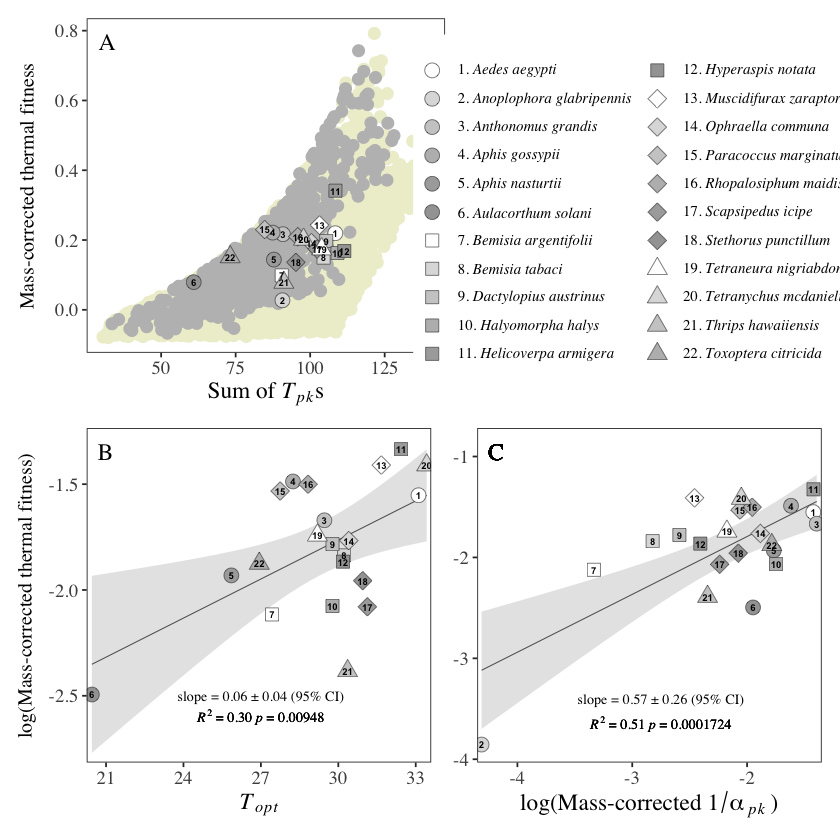

In [52]:
legend <- get_legend(MassCorr_rm_opt_vs_AlphaTpk + theme(legend.position = c(0.515,0.525)))

rm_calcs_Plot <- (SumTpks_plot+legend)/(MassCorr_rm_opt+MassCorr_rm_opt_vs_AlphaTpk)

rm_calcs_Plot

save_plot(rm_calcs_Plot, file="../results/SumTpks.pdf", 
          base_height=21, base_width = 22, base_asp = 1.5, units="cm")


## Relationship between $r_{m,opt}$ and $T_{pk}$s of other (mass-corrected) traits ($b_{max}$, $z$ and $z_J$) 

In [53]:
# bmax (fecundity)

betaMass <- as_tibble(read_csv('../data/bmaxT_pksMass.csv')) %>%
  select(species, bmax, bmaxLwr, bmaxUpr) %>%
  filter(species == 'Anoplophora glabripennis' |
           species == 'Halyomorpha halys' |
           species == 'Aedes aegypti'|
           species == 'Anthonomus grandis' |
           species == 'Paracoccus marginatus' |
           species == 'Aphis gossypii' |
           species == 'Bemisia tabaci' |
           species == 'Tetraneura nigriabdominalis' |
           species == 'Stethorus punctillum' |
           species == 'Tetranychus mcdanieli' |
           species == 'Muscidifurax zaraptor' |
           species == 'Aphis nasturtii' |
           species == 'Rhopalosiphum maidis' |
           species == 'Thrips hawaiiensis' |
           species == 'Helicoverpa armigera' |
           species == 'Scapsipedus icipe' |
           species == 'Hyperaspis notata' |
           species == 'Toxoptera citricida'|
           species == 'Ophraella communa' |
           species == 'Bemisia argentifolii'|
           species == 'Dactylopius austrinus'|
           species == 'Aulacorthum solani') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  mutate(curve_ID = as.numeric(curve_ID)) %>%
  rename(b_maxpk = bmax, b_maxpkLwr = bmaxLwr, b_maxpkUpr = bmaxUpr) %>%
  arrange(curve_ID)

betaMass

betarm_data <- inner_join(rm_data, betaMass)
betarm_data


Rows: 44 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): bmax, bmaxLwr, bmaxUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,b_maxpk,b_maxpkLwr,b_maxpkUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,3.286732,2.474436,4.346238,1
Halyomorpha halys,7.579694,6.103184,9.660420,2
Aedes aegypti,10.132196,9.026152,11.677251,3
Anthonomus grandis,7.287018,5.873555,11.107361,4
Paracoccus marginatus,26.757230,23.687671,34.570577,5
Aphis gossypii,3.301794,2.776098,3.983136,6
Bemisia tabaci,13.001684,9.355172,17.998032,7
Tetraneura nigriabdominalis,3.079183,2.494742,3.597847,8
Stethorus punctillum,7.114108,6.305991,8.840443,9


Joining with `by = join_by(species, curve_ID)`


species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,⋯,kappa,rm_opt,rm_optLwr,rm_optUpr,mass,kT,rm_massCor,b_maxpk,b_maxpkLwr,b_maxpkUpr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.97297,297.190161,316.589257,275.438861,1,3.279634,2.502936,4.185761,0.01833954,⋯,0.01,0.01275390,1.050471e-02,0.01501273,159.8000000,38.53747,0.02724810,3.286732,2.474436,4.346238
Halyomorpha halys,29.77477,29.803247,35.147055,26.738998,2,6.254051,4.571432,7.953408,0.01385860,⋯,0.01,0.07630760,6.770028e-02,0.08018689,158.8100000,38.30825,0.16287606,7.579694,6.103184,9.660420
Aedes aegypti,33.10811,5.430507,6.139773,4.974288,3,8.966715,6.913063,10.160802,0.04764627,⋯,0.01,0.19781352,1.850417e-01,0.19297752,1.9991667,37.89130,0.21941596,10.132196,9.026152,11.677251
Anthonomus grandis,29.45946,11.006110,13.270318,9.919390,4,6.292496,5.369757,10.030917,0.04069540,⋯,0.01,0.14365573,1.333461e-01,0.15805344,15.6000000,38.34817,0.21668811,7.287018,5.873555,11.107361
Paracoccus marginatus,27.74775,11.249195,14.346792,9.138949,5,14.925416,10.285558,45.486877,0.05028942,⋯,0.01,0.19174885,1.642492e-01,0.24402898,3.3650000,38.56632,0.22992112,26.757230,23.687671,34.570577
Aphis gossypii,28.24324,4.573511,4.799221,4.398614,6,3.206500,2.552281,3.740294,0.12279223,⋯,0.01,0.23529948,2.058082e-01,0.25404828,0.6633333,38.50291,0.22128346,3.301794,2.776098,3.983136
Bemisia tabaci,30.22523,12.226305,13.061690,10.742313,7,9.793602,7.520674,11.794230,0.06851774,⋯,0.01,0.17981067,1.612936e-01,0.19739044,0.2931250,38.25137,0.14965021,13.001684,9.355172,17.998032
Tetraneura nigriabdominalis,29.18919,8.639694,8.704294,8.580309,8,3.037762,2.606394,3.839115,0.08826039,⋯,0.01,0.17766166,1.704250e-01,0.18837408,0.8673000,38.38245,0.17391730,3.079183,2.494742,3.597847
Stethorus punctillum,30.94595,7.449749,7.965410,7.036821,9,6.478403,4.881562,8.662371,0.03427692,⋯,0.01,0.15195914,1.522272e-01,0.15006184,0.4800000,38.16071,0.13615544,7.114108,6.305991,8.840443


In [54]:
# linear model (note the allometry is linear in log-log scale)
betarm_model <- lm(log(rm_opt/mass^-0.1) ~ log(bmax/mass^0.12), data = betarm_data)
summary(betarm_model)
confint(betarm_model, level=.95)
anova(betarm_model)


Call:
lm(formula = log(rm_opt/mass^-0.1) ~ log(bmax/mass^0.12), data = betarm_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5774 -0.2471  0.1094  0.3396  0.6102 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -2.4401     0.2815  -8.668  3.3e-08 ***
log(bmax/mass^0.12)   0.2816     0.1341   2.100   0.0486 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4971 on 20 degrees of freedom
Multiple R-squared:  0.1807,	Adjusted R-squared:  0.1397 
F-statistic:  4.41 on 1 and 20 DF,  p-value: 0.04861


,2.5 %,97.5 %
(Intercept),-3.027248436,-1.852889
log(bmax/mass^0.12),0.001892404,0.561223


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(bmax/mass^0.12),1,1.089769,1.0897688,4.41033,0.04860996
Residuals,20,4.941893,0.2470946,NA,NA


# A tibble: 22 × 2
# Groups:   species [22]
   species                     curve_ID
   <chr>                          <dbl>
 1 Anoplophora glabripennis           1
 2 Halyomorpha halys                  2
 3 Aedes aegypti                      3
 4 Anthonomus grandis                 4
 5 Paracoccus marginatus              5
 6 Aphis gossypii                     6
 7 Bemisia tabaci                     7
 8 Tetraneura nigriabdominalis        8
 9 Stethorus punctillum               9
10 Tetranychus mcdanieli             10
11 Muscidifurax zaraptor             11
12 Aphis nasturtii                   12
13 Rhopalosiphum maidis              13
14 Thrips hawaiiensis                14
15 Helicoverpa armigera              15
16 Scapsipedus icipe                 16
17 Hyperaspis notata                 17
18 Toxoptera citricida               18
19 Ophraella communa                 19
20 Bemisia argentifolii              20
21 Dactylopius austrinus             21
22 Aulacorthum solani               

[1] "(1) Aedes aegypti"                "(2) Anoplophora glabripennis"    
 [3] "(3) Anthonomus grandis"           "(4) Aphis gossypii"              
 [5] "(5) Aphis nasturtii"              "(6) Aulacorthum solani"          
 [7] "(7) Bemisia argentifolii"         "(8) Bemisia tabaci"              
 [9] "(9) Dactylopius austrinus"        "(10) Halyomorpha halys"          
[11] "(11) Helicoverpa armigera"        "(12) Hyperaspis notata"          
[13] "(13) Muscidifurax zaraptor"       "(14) Ophraella communa"          
[15] "(15) Paracoccus marginatus"       "(16) Rhopalosiphum maidis"       
[17] "(17) Scapsipedus icipe"           "(18) Stethorus punctillum"       
[19] "(19) Tetraneura nigriabdominalis" "(20) Tetranychus mcdanieli"      
[21] "(21) Thrips hawaiiensis"          "(22) Toxoptera citricida"

`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


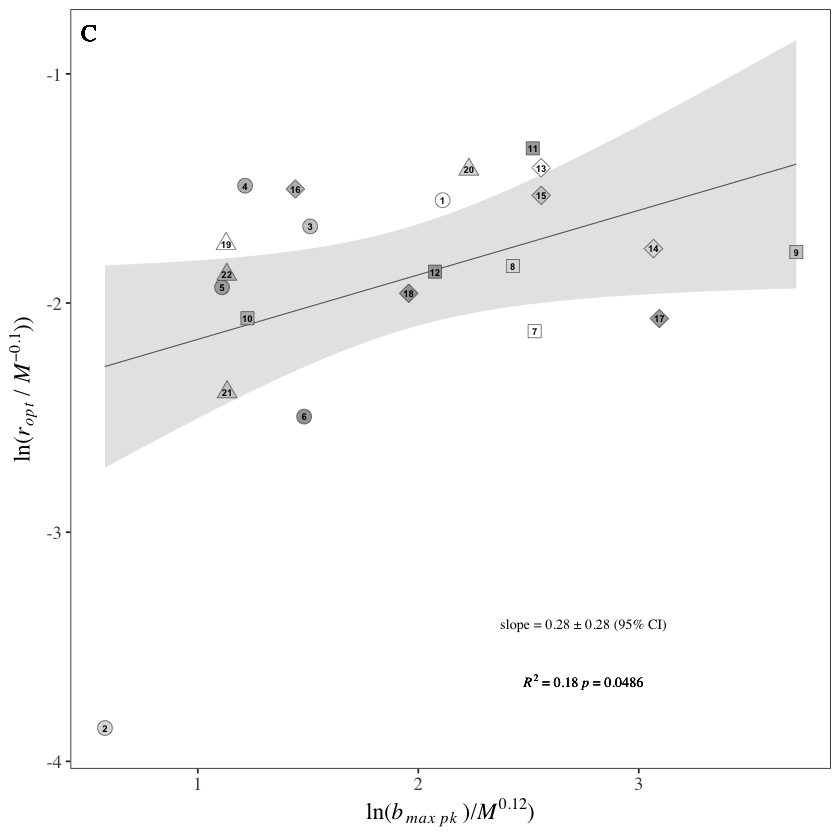

In [55]:
## plot $b_max$ vs $r_opt$


betarm_data %>% distinct(species, curve_ID) %>% print(n=22)

betarm_data <- betarm_data %>%
  mutate(description = 
           case_when(curve_ID == "3" ~ "(1) Aedes aegypti",
                     curve_ID == "1" ~ "(2) Anoplophora glabripennis",
                     curve_ID == "4" ~ "(3) Anthonomus grandis",
                     curve_ID == "6" ~ "(4) Aphis gossypii",
                     curve_ID == "12" ~ "(5) Aphis nasturtii",
                     curve_ID == "22" ~ "(6) Aulacorthum solani",
                     curve_ID == "20" ~ "(7) Bemisia argentifolii",
                     curve_ID == "7" ~ "(8) Bemisia tabaci",             
                     curve_ID == "21" ~ "(9) Dactylopius austrinus",      
                     curve_ID == "2" ~ "(10) Halyomorpha halys",          
                     curve_ID == "15" ~ "(11) Helicoverpa armigera",       
                     curve_ID == "17" ~ "(12) Hyperaspis notata",          
                     curve_ID == "11" ~ "(13) Muscidifurax zaraptor",      
                     curve_ID == "19" ~ "(14) Ophraella communa",          
                     curve_ID == "5" ~ "(15) Paracoccus marginatus",      
                     curve_ID == "13" ~ "(16) Rhopalosiphum maidis",       
                     curve_ID == "16" ~  "(17) Scapsipedus icipe",          
                     curve_ID == "9" ~ "(18) Stethorus punctillum",       
                     curve_ID == "8" ~ "(19) Tetraneura nigriabdominalis",
                     curve_ID == "10" ~ "(20) Tetranychus mcdanieli",      
                     curve_ID == "14" ~ "(21) Thrips hawaiiensis",         
                     curve_ID == "18"~ "(22) Toxoptera citricida")) %>%
  mutate(description = 
           factor(description, 
                  levels = c("(1) Aedes aegypti",
                             "(2) Anoplophora glabripennis",  
                             "(3) Anthonomus grandis",         
                             "(4) Aphis gossypii",             
                             "(5) Aphis nasturtii",            
                             "(6) Aulacorthum solani",         
                             "(7) Bemisia argentifolii",       
                             "(8) Bemisia tabaci",             
                             "(9) Dactylopius austrinus",      
                             "(10) Halyomorpha halys",          
                             "(11) Helicoverpa armigera",       
                             "(12) Hyperaspis notata",          
                             "(13) Muscidifurax zaraptor",      
                             "(14) Ophraella communa",          
                             "(15) Paracoccus marginatus",      
                             "(16) Rhopalosiphum maidis",       
                             "(17) Scapsipedus icipe",          
                             "(18) Stethorus punctillum",       
                             "(19) Tetraneura nigriabdominalis",
                             "(20) Tetranychus mcdanieli",      
                             "(21) Thrips hawaiiensis",         
                             "(22) Toxoptera citricida"))) %>%
                              arrange(description)

levels(betarm_data$description)

MassCorr_rm_opt_vs_BetaTpk <-
  betarm_data %>%
  ggplot(aes(x=log(bmax/mass^0.12), y = log(rm_opt/mass^-0.1)))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("ln(",italic(r[opt])," / ",
                                            italic(M^-0.1),"))"))),
                     limits=c(-4,-0.75),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(plain(paste("ln(", italic(b[max][' '][pk])~")/",
                                            italic(M^0.12),")"))))+
  geom_point(aes(shape=description, fill=description), size=4, stroke=0.25, col='#333333')+
  scale_shape_manual(values = c(21,21,21,21,21,21,
                                22,22,22,22,22,22,
                                23,23,23,23,23,23,
                                24,24,24,24),
                     labels = lbs,
                     name=expression(bold("")),
                     guide = guide_legend(nrow=11,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#FFFFFF","#DDDDDD","#CCCCCC","#BBBBBB",'#AAAAAA',"#A3A3A3",
                               "#FFFFFF","#DDDDDD","#CCCCCC","#BBBBBB",'#AAAAAA',"#A3A3A3",
                               "#FFFFFF","#DDDDDD","#CCCCCC","#BBBBBB",'#AAAAAA',"#A3A3A3",
                               "#FFFFFF", "#DDDDDD","#CCCCCC","#BBBBBB"),
                    labels = lbs,
                    name=expression(bold("")),
                    guide = guide_legend(nrow=11,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333"),
                      labels = lbs,
                      name=expression(bold("")),
                      guide = guide_legend(nrow=11,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  geom_text(aes(label = seq(1:22), x=log(bmax/mass^0.12), y = log(rm_opt/mass^-0.1)), 
            size = 2, color = '#000000', fontface = 'bold')+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=14),
        legend.position = 'none',
        legend.text = element_text(size = 9, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.5, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.7, vjust=2,
                label = "C"),size = 5, colour = "black", family='Times')+
  annotate("text", x = 2.75, y = -3.65, label = italic("R")^2~"= 0.18"~italic("p")~"= 0.0486", size=3, family='Times')+
  annotate("text", x = 2.75, y = -3.4, label = "slope = 0.28 ± 0.28 (95% CI)", size=3, family='Times')
 
MassCorr_rm_opt_vs_BetaTpk


In [56]:
# z (adult mortality rate)

zMass <- as_tibble(read_csv('../data/z_pksT_pksMass.csv')) %>% 
  select(species, zpk, zpkLwr, zpkUpr) %>%
  filter(species == 'Anoplophora glabripennis' |
           species == 'Halyomorpha halys' |
           species == 'Aedes aegypti'|
           species == 'Anthonomus grandis' |
           species == 'Paracoccus marginatus' |
           species == 'Aphis gossypii' |
           species == 'Bemisia tabaci' |
           species == 'Tetraneura nigriabdominalis' |
           species == 'Stethorus punctillum' |
           species == 'Tetranychus mcdanieli' |
           species == 'Muscidifurax zaraptor' |
           species == 'Aphis nasturtii' |
           species == 'Rhopalosiphum maidis' |
           species == 'Thrips hawaiiensis' |
           species == 'Helicoverpa armigera' |
           species == 'Scapsipedus icipe' |
           species == 'Hyperaspis notata' |
           species == 'Toxoptera citricida'|
           species == 'Ophraella communa' |
           species == 'Bemisia argentifolii'|
           species == 'Dactylopius austrinus'|
           species == 'Aulacorthum solani') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  mutate(curve_ID = as.numeric(curve_ID)) %>%
  arrange(curve_ID)

zMass

zrm_data <- inner_join(rm_data, zMass)


Rows: 34 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): zpk, zpkLwr, zpkUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,zpk,zpkLwr,zpkUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,0.006981302,0.008340613,0.006026721,1
Halyomorpha halys,0.004118571,0.004708180,0.002783295,2
Aedes aegypti,0.029080306,0.033957240,0.024296551,3
Anthonomus grandis,0.015646824,0.018447864,0.013850260,4
Paracoccus marginatus,0.021560283,0.026348713,0.019552732,5
Aphis gossypii,0.032803103,0.033983297,0.032462923,6
Bemisia tabaci,0.039444080,0.042020167,0.036418754,7
Tetraneura nigriabdominalis,0.036058235,0.038715273,0.033018069,8
Stethorus punctillum,0.008930564,0.009925306,0.006199906,9


Joining with `by = join_by(species, curve_ID)`


In [57]:
# linear model (note the allometry is linear in log-log scale)
zrm_model <- lm(log(rm_opt/mass^-0.1) ~ log(zpk/mass^-0.09), data = zrm_data)
summary(zrm_model)
confint(zrm_model, level=.95)
anova(zrm_model)


Call:
lm(formula = log(rm_opt/mass^-0.1) ~ log(zpk/mass^-0.09), data = zrm_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.71200 -0.07651  0.11501  0.22107  0.47446 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)          -0.2405     0.5542  -0.434  0.66896   
log(zpk/mass^-0.09)   0.4219     0.1394   3.027  0.00666 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4548 on 20 degrees of freedom
Multiple R-squared:  0.3142,	Adjusted R-squared:  0.2799 
F-statistic: 9.163 on 1 and 20 DF,  p-value: 0.006657


,2.5 %,97.5 %
(Intercept),-1.3966613,0.9156175
log(zpk/mass^-0.09),0.1311801,0.7126816


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(zpk/mass^-0.09),1,1.895195,1.8951947,9.163349,0.006656698
Residuals,20,4.136467,0.2068234,NA,NA


# A tibble: 22 × 2
# Groups:   species [22]
   species                     curve_ID
   <chr>                          <dbl>
 1 Anoplophora glabripennis           1
 2 Halyomorpha halys                  2
 3 Aedes aegypti                      3
 4 Anthonomus grandis                 4
 5 Paracoccus marginatus              5
 6 Aphis gossypii                     6
 7 Bemisia tabaci                     7
 8 Tetraneura nigriabdominalis        8
 9 Stethorus punctillum               9
10 Tetranychus mcdanieli             10
11 Muscidifurax zaraptor             11
12 Aphis nasturtii                   12
13 Rhopalosiphum maidis              13
14 Thrips hawaiiensis                14
15 Helicoverpa armigera              15
16 Scapsipedus icipe                 16
17 Hyperaspis notata                 17
18 Toxoptera citricida               18
19 Ophraella communa                 19
20 Bemisia argentifolii              20
21 Dactylopius austrinus             21
22 Aulacorthum solani               

[1] "(1) Aedes aegypti"                "(2) Anoplophora glabripennis"    
 [3] "(3) Anthonomus grandis"           "(4) Aphis gossypii"              
 [5] "(5) Aphis nasturtii"              "(6) Aulacorthum solani"          
 [7] "(7) Bemisia argentifolii"         "(8) Bemisia tabaci"              
 [9] "(9) Dactylopius austrinus"        "(10) Halyomorpha halys"          
[11] "(11) Helicoverpa armigera"        "(12) Hyperaspis notata"          
[13] "(13) Muscidifurax zaraptor"       "(14) Ophraella communa"          
[15] "(15) Paracoccus marginatus"       "(16) Rhopalosiphum maidis"       
[17] "(17) Scapsipedus icipe"           "(18) Stethorus punctillum"       
[19] "(19) Tetraneura nigriabdominalis" "(20) Tetranychus mcdanieli"      
[21] "(21) Thrips hawaiiensis"          "(22) Toxoptera citricida"

`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


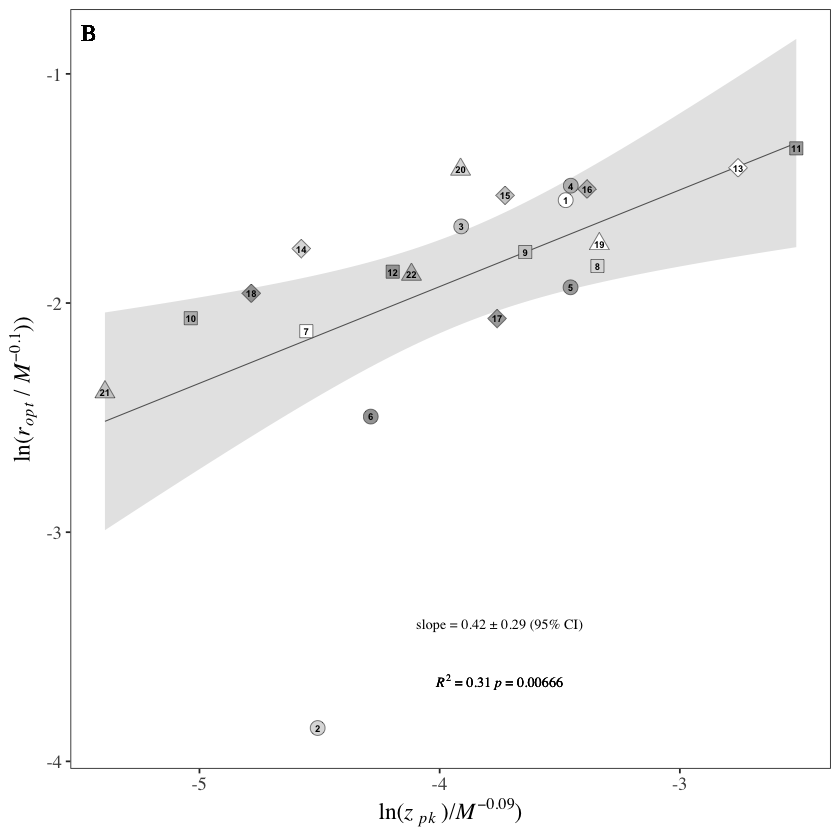

In [58]:
## plot $z$ vs $r_opt$


zrm_data %>% distinct(species, curve_ID) %>% print(n=22)

zrm_data <- zrm_data %>%
  mutate(description = 
           case_when(curve_ID == "3" ~ "(1) Aedes aegypti",
                     curve_ID == "1" ~ "(2) Anoplophora glabripennis",
                     curve_ID == "4" ~ "(3) Anthonomus grandis",
                     curve_ID == "6" ~ "(4) Aphis gossypii",
                     curve_ID == "12" ~ "(5) Aphis nasturtii",
                     curve_ID == "22" ~ "(6) Aulacorthum solani",
                     curve_ID == "20" ~ "(7) Bemisia argentifolii",
                     curve_ID == "7" ~ "(8) Bemisia tabaci",             
                     curve_ID == "21" ~ "(9) Dactylopius austrinus",      
                     curve_ID == "2" ~ "(10) Halyomorpha halys",          
                     curve_ID == "15" ~ "(11) Helicoverpa armigera",       
                     curve_ID == "17" ~ "(12) Hyperaspis notata",          
                     curve_ID == "11" ~ "(13) Muscidifurax zaraptor",      
                     curve_ID == "19" ~ "(14) Ophraella communa",          
                     curve_ID == "5" ~ "(15) Paracoccus marginatus",      
                     curve_ID == "13" ~ "(16) Rhopalosiphum maidis",       
                     curve_ID == "16" ~  "(17) Scapsipedus icipe",          
                     curve_ID == "9" ~ "(18) Stethorus punctillum",       
                     curve_ID == "8" ~ "(19) Tetraneura nigriabdominalis",
                     curve_ID == "10" ~ "(20) Tetranychus mcdanieli",      
                     curve_ID == "14" ~ "(21) Thrips hawaiiensis",         
                     curve_ID == "18"~ "(22) Toxoptera citricida")) %>%
  mutate(description = 
           factor(description, 
                  levels = c("(1) Aedes aegypti",
                             "(2) Anoplophora glabripennis",  
                             "(3) Anthonomus grandis",         
                             "(4) Aphis gossypii",             
                             "(5) Aphis nasturtii",            
                             "(6) Aulacorthum solani",         
                             "(7) Bemisia argentifolii",       
                             "(8) Bemisia tabaci",             
                             "(9) Dactylopius austrinus",      
                             "(10) Halyomorpha halys",          
                             "(11) Helicoverpa armigera",       
                             "(12) Hyperaspis notata",          
                             "(13) Muscidifurax zaraptor",      
                             "(14) Ophraella communa",          
                             "(15) Paracoccus marginatus",      
                             "(16) Rhopalosiphum maidis",       
                             "(17) Scapsipedus icipe",          
                             "(18) Stethorus punctillum",       
                             "(19) Tetraneura nigriabdominalis",
                             "(20) Tetranychus mcdanieli",      
                             "(21) Thrips hawaiiensis",         
                             "(22) Toxoptera citricida"))) %>%
                             arrange(description)

levels(zrm_data$description)

MassCorr_rm_opt_vs_zTpk <-
  zrm_data %>%
  ggplot(aes(x=log(zpk/mass^-0.09), y = log(rm_opt/mass^-0.1)))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("ln(",italic(r[opt])," / ",
                                            italic(M^-0.1),"))"))),
                     limits=c(-4,-0.75),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(plain(paste("ln(", italic(z[' '][pk])~")/",
                                            italic(M^-0.09),")"))))+
  geom_point(aes(shape=species, fill=species), size=4, stroke=0.25, col='#333333')+
  scale_shape_manual(values = c(21,21,21,21,21,21,
                                22,22,22,22,22,22,
                                23,23,23,23,23,23,
                                24,24,24,24),
                     labels = lbs,
                     name=expression(bold("")),
                     guide = guide_legend(nrow=11,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#FFFFFF","#DDDDDD","#CCCCCC","#BBBBBB",'#AAAAAA',"#A3A3A3",
                               "#FFFFFF","#DDDDDD","#CCCCCC","#BBBBBB",'#AAAAAA',"#A3A3A3",
                               "#FFFFFF","#DDDDDD","#CCCCCC","#BBBBBB",'#AAAAAA',"#A3A3A3",
                               "#FFFFFF", "#DDDDDD","#CCCCCC","#BBBBBB"),
                    labels = lbs,
                    name=expression(bold("")),
                    guide = guide_legend(nrow=11,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333"),
                      labels = lbs,
                      name=expression(bold("")),
                      guide = guide_legend(nrow=11,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  geom_text(aes(label = seq(1:22), x=log(zpk/mass^-0.09), y = log(rm_opt/mass^-0.1)), 
            size = 2, color = '#000000', fontface = 'bold')+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=14),
        legend.position = 'none',
        legend.text = element_text(size = 9, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.4, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.7, vjust=2,
                label = "B"),size = 5, colour = "black", family = 'Times')+
 annotate("text", x = -3.75, y = -3.65, label = italic("R")^2~"= 0.31"~italic("p")~"= 0.00666", size=3, family='Times')+
 annotate("text", x = -3.75, y = -3.4, label = "slope = 0.42 ± 0.29 (95% CI)", size=3, family='Times')
 

MassCorr_rm_opt_vs_zTpk


In [59]:
# $z_J$ (juvenile mortality rate)


zJMass <- as_tibble(read_csv('../data/zj_pksT_pksMass.csv')) %>% 
  select(species, zjpk, zjpkLwr, zjpkUpr) %>%
  filter(species == 'Anoplophora glabripennis' |
           species == 'Halyomorpha halys' |
           species == 'Aedes aegypti'|
           species == 'Anthonomus grandis' |
           species == 'Paracoccus marginatus' |
           species == 'Aphis gossypii' |
           species == 'Bemisia tabaci' |
           species == 'Tetraneura nigriabdominalis' |
           species == 'Stethorus punctillum' |
           species == 'Tetranychus mcdanieli' |
           species == 'Muscidifurax zaraptor' |
           species == 'Aphis nasturtii' |
           species == 'Rhopalosiphum maidis' |
           species == 'Thrips hawaiiensis' |
           species == 'Helicoverpa armigera' |
           species == 'Scapsipedus icipe' |
           species == 'Hyperaspis notata' |
           species == 'Toxoptera citricida'|
           species == 'Ophraella communa' |
           species == 'Bemisia argentifolii'|
           species == 'Dactylopius austrinus'|
           species == 'Aulacorthum solani') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  mutate(curve_ID = as.numeric(curve_ID)) %>%
  arrange(curve_ID)

zJMass

zJrm_data <- inner_join(rm_data, zJMass)


Rows: 34 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): zjpk, zjpkLwr, zjpkUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,zjpk,zjpkLwr,zjpkUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,7.652256e-04,0.0008392504,6.743264e-04,1
Halyomorpha halys,2.134125e-03,0.0024486399,1.806119e-03,2
Aedes aegypti,2.017240e-02,0.0227815438,1.815153e-02,3
Anthonomus grandis,1.398698e-02,0.0148502193,1.338455e-02,4
Paracoccus marginatus,9.594182e-03,0.0127847175,7.755297e-03,5
Aphis gossypii,3.677762e-02,0.0436667630,3.355850e-02,6
Bemisia tabaci,1.285423e-02,0.0148617091,8.982088e-03,7
Tetraneura nigriabdominalis,9.275934e-03,0.0119946452,8.001464e-03,8
Stethorus punctillum,1.643507e-02,0.0186532555,1.452759e-02,9


Joining with `by = join_by(species, curve_ID)`


In [60]:
# linear model (note the allometry is linear in log-log scale)
zJrm_model <- lm(log(rm_opt/mass^-0.11) ~ log(zjpk/mass^-0.22), data = zJrm_data)
summary(zJrm_model)
confint(zJrm_model)
anova(zJrm_model)


Call:
lm(formula = log(rm_opt/mass^-0.11) ~ log(zjpk/mass^-0.22), data = zJrm_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.80165 -0.10981  0.07107  0.30521  0.60200 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)          -1.41907    0.44760  -3.170  0.00481 **
log(zjpk/mass^-0.22)  0.09623    0.08957   1.074  0.29543   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5289 on 20 degrees of freedom
Multiple R-squared:  0.05457,	Adjusted R-squared:  0.007296 
F-statistic: 1.154 on 1 and 20 DF,  p-value: 0.2954


,2.5 %,97.5 %
(Intercept),-2.35274410,-0.4853950
log(zjpk/mass^-0.22),-0.09060123,0.2830604


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(zjpk/mass^-0.22),1,0.3228618,0.3228618,1.15434,0.2954344
Residuals,20,5.5938788,0.2796939,NA,NA


# A tibble: 22 × 2
# Groups:   species [22]
   species                     curve_ID
   <chr>                          <dbl>
 1 Anoplophora glabripennis           1
 2 Halyomorpha halys                  2
 3 Aedes aegypti                      3
 4 Anthonomus grandis                 4
 5 Paracoccus marginatus              5
 6 Aphis gossypii                     6
 7 Bemisia tabaci                     7
 8 Tetraneura nigriabdominalis        8
 9 Stethorus punctillum               9
10 Tetranychus mcdanieli             10
11 Muscidifurax zaraptor             11
12 Aphis nasturtii                   12
13 Rhopalosiphum maidis              13
14 Thrips hawaiiensis                14
15 Helicoverpa armigera              15
16 Scapsipedus icipe                 16
17 Hyperaspis notata                 17
18 Toxoptera citricida               18
19 Ophraella communa                 19
20 Bemisia argentifolii              20
21 Dactylopius austrinus             21
22 Aulacorthum solani               

[1] "(1) Aedes aegypti"                "(2) Anoplophora glabripennis"    
 [3] "(3) Anthonomus grandis"           "(4) Aphis gossypii"              
 [5] "(5) Aphis nasturtii"              "(6) Aulacorthum solani"          
 [7] "(7) Bemisia argentifolii"         "(8) Bemisia tabaci"              
 [9] "(9) Dactylopius austrinus"        "(10) Halyomorpha halys"          
[11] "(11) Helicoverpa armigera"        "(12) Hyperaspis notata"          
[13] "(13) Muscidifurax zaraptor"       "(14) Ophraella communa"          
[15] "(15) Paracoccus marginatus"       "(16) Rhopalosiphum maidis"       
[17] "(17) Scapsipedus icipe"           "(18) Stethorus punctillum"       
[19] "(19) Tetraneura nigriabdominalis" "(20) Tetranychus mcdanieli"      
[21] "(21) Thrips hawaiiensis"          "(22) Toxoptera citricida"

`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


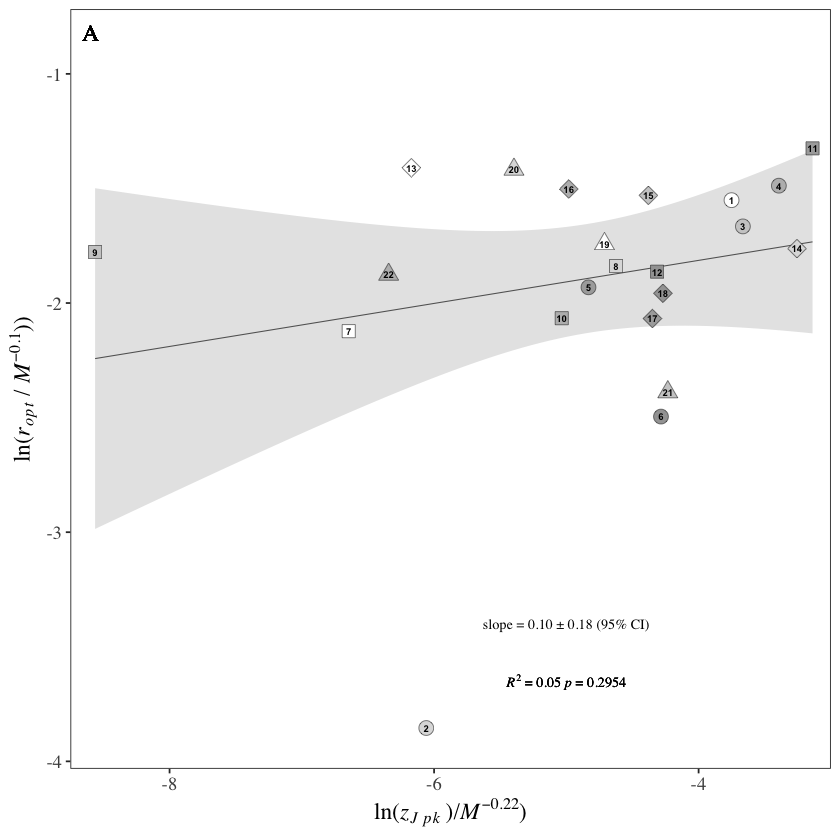

In [61]:

zJrm_data %>% distinct(species, curve_ID) %>% print(n=22)

zJrm_data <- zJrm_data %>%
  mutate(description = 
           case_when(curve_ID == "3" ~ "(1) Aedes aegypti",
                     curve_ID == "1" ~ "(2) Anoplophora glabripennis",
                     curve_ID == "4" ~ "(3) Anthonomus grandis",
                     curve_ID == "6" ~ "(4) Aphis gossypii",
                     curve_ID == "12" ~ "(5) Aphis nasturtii",
                     curve_ID == "22" ~ "(6) Aulacorthum solani",
                     curve_ID == "20" ~ "(7) Bemisia argentifolii",
                     curve_ID == "7" ~ "(8) Bemisia tabaci",             
                     curve_ID == "21" ~ "(9) Dactylopius austrinus",      
                     curve_ID == "2" ~ "(10) Halyomorpha halys",          
                     curve_ID == "15" ~ "(11) Helicoverpa armigera",       
                     curve_ID == "17" ~ "(12) Hyperaspis notata",          
                     curve_ID == "11" ~ "(13) Muscidifurax zaraptor",      
                     curve_ID == "19" ~ "(14) Ophraella communa",          
                     curve_ID == "5" ~ "(15) Paracoccus marginatus",      
                     curve_ID == "13" ~ "(16) Rhopalosiphum maidis",       
                     curve_ID == "16" ~  "(17) Scapsipedus icipe",          
                     curve_ID == "9" ~ "(18) Stethorus punctillum",       
                     curve_ID == "8" ~ "(19) Tetraneura nigriabdominalis",
                     curve_ID == "10" ~ "(20) Tetranychus mcdanieli",      
                     curve_ID == "14" ~ "(21) Thrips hawaiiensis",         
                     curve_ID == "18"~ "(22) Toxoptera citricida")) %>%
  mutate(description = 
           factor(description, 
                  levels = c("(1) Aedes aegypti",
                             "(2) Anoplophora glabripennis",  
                             "(3) Anthonomus grandis",         
                             "(4) Aphis gossypii",             
                             "(5) Aphis nasturtii",            
                             "(6) Aulacorthum solani",         
                             "(7) Bemisia argentifolii",       
                             "(8) Bemisia tabaci",             
                             "(9) Dactylopius austrinus",      
                             "(10) Halyomorpha halys",          
                             "(11) Helicoverpa armigera",       
                             "(12) Hyperaspis notata",          
                             "(13) Muscidifurax zaraptor",      
                             "(14) Ophraella communa",          
                             "(15) Paracoccus marginatus",      
                             "(16) Rhopalosiphum maidis",       
                             "(17) Scapsipedus icipe",          
                             "(18) Stethorus punctillum",       
                             "(19) Tetraneura nigriabdominalis",
                             "(20) Tetranychus mcdanieli",      
                             "(21) Thrips hawaiiensis",         
                             "(22) Toxoptera citricida"))) %>%
                              arrange(description)

levels(zJrm_data$description)


MassCorr_rm_opt_vs_zJTpk <-
  zJrm_data %>%
  ggplot(aes(x=log(zjpk/mass^-0.22), y = log(rm_opt/mass^-0.1)))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("ln(",italic(r[opt])," / ",
                                            italic(M^-0.1),"))"))),
                     limits=c(-4,-0.75),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(plain(paste("ln(", italic(z[J][' '][pk])~")/",
                                            italic(M^-0.22),")"))),
                     limits=c(-8.75,-3),
                     expand = c(0, 0),
                     breaks=seq(-8,-4, by=2))+
  geom_point(aes(shape=species, fill=species), size=4, stroke=0.25, col='#333333')+
  scale_shape_manual(values = c(21,21,21,21,21,21,
                                22,22,22,22,22,22,
                                23,23,23,23,23,23,
                                24,24,24,24),
                     labels = lbs,
                     name=expression(bold("")),
                     guide = guide_legend(nrow=11,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#FFFFFF","#DDDDDD","#CCCCCC","#BBBBBB",'#AAAAAA',"#A3A3A3",
                               "#FFFFFF","#DDDDDD","#CCCCCC","#BBBBBB",'#AAAAAA',"#A3A3A3",
                               "#FFFFFF","#DDDDDD","#CCCCCC","#BBBBBB",'#AAAAAA',"#A3A3A3",
                               "#FFFFFF", "#DDDDDD","#CCCCCC","#BBBBBB"),
                    labels = lbs,
                    name=expression(bold("")),
                    guide = guide_legend(nrow=11,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333"),
                      labels = lbs,
                      name=expression(bold("")),
                      guide = guide_legend(nrow=11,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  geom_text(aes(label = seq(1:22), x=log(zjpk/mass^-0.22), y = log(rm_opt/mass^-0.1)), 
            size = 2, color = '#000000', fontface = 'bold')+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=14),
        legend.position = 'none',
        legend.text = element_text(size = 9, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.4, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.7, vjust=2,
                label = "A"), size = 5, colour = "black", family='Times')+
 annotate("text", x = -5, y = -3.65, label = italic("R")^2~"= 0.05"~italic("p")~"= 0.2954", size=3, family='Times')+
 annotate("text", x = -5, y = -3.4, label = "slope = 0.10 ± 0.18 (95% CI)", size=3, family='Times')
 
MassCorr_rm_opt_vs_zJTpk


`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


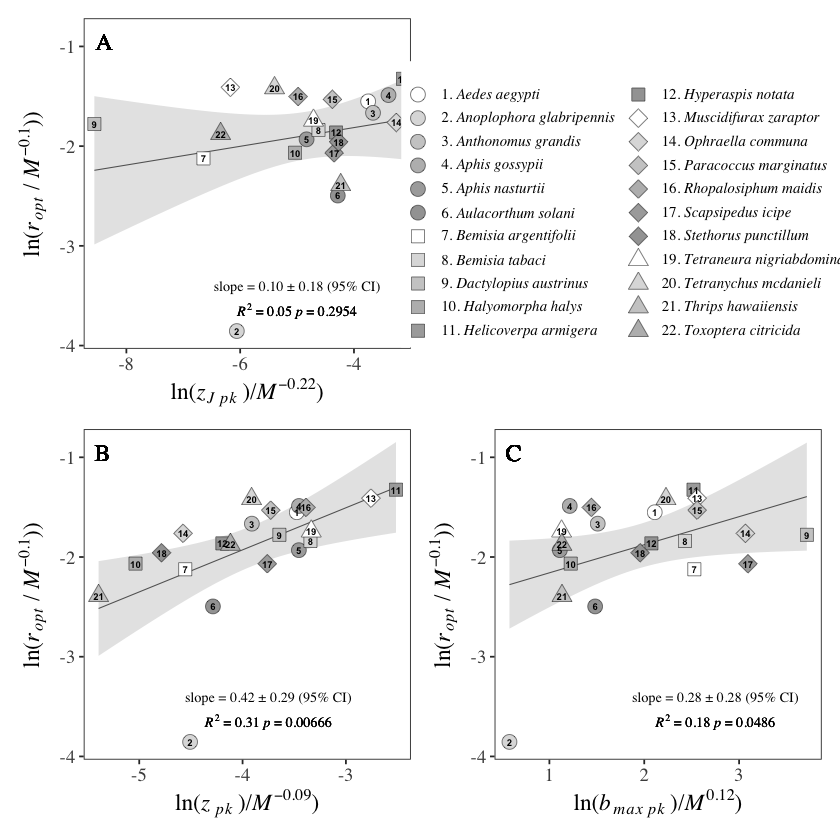

In [62]:
legend <- get_legend(MassCorr_rm_opt_vs_BetaTpk + theme(legend.position = c(0.515,0.525)))

rm_vs_OtherTraitPks <- MassCorr_rm_opt_vs_zJTpk+legend+
  MassCorr_rm_opt_vs_zTpk+
  MassCorr_rm_opt_vs_BetaTpk+plot_layout(nrow = 2, byrow = TRUE)

rm_vs_OtherTraitPks


save_plot(rm_vs_OtherTraitPks, file= "../results/SI/rm_vs_OtherTraitPks.pdf",
          base_height=18, base_width = 20, base_asp = 1.5, units="cm")


## $r_m$ vs Variance of trait  $T_{pk}$s 

In [63]:
VarLM <-   lm(PlotData$rm_massCor ~ PlotData$variance)

summary(VarLM)
confint(VarLM, level=.95)


Call:
lm(formula = PlotData$rm_massCor ~ PlotData$variance)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.146450 -0.028534  0.005156  0.046171  0.162848 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.1937895  0.0346725   5.589  1.8e-05 ***
PlotData$variance -0.0003323  0.0005154  -0.645    0.526    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06782 on 20 degrees of freedom
Multiple R-squared:  0.02037,	Adjusted R-squared:  -0.02861 
F-statistic: 0.4158 on 1 and 20 DF,  p-value: 0.5264


,2.5 %,97.5 %
(Intercept),0.121464031,0.2661150261
PlotData$variance,-0.001407433,0.0007427346


`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


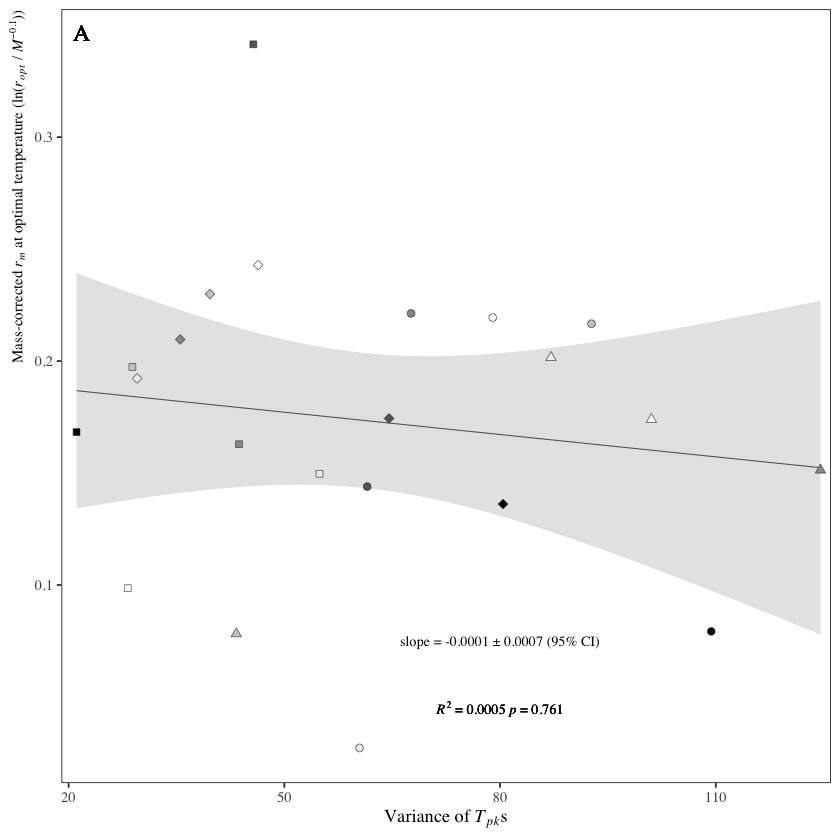

In [64]:
Var_rm <- ggplot(PlotData, aes(x=variance, y=rm_massCor, colour = species, fill = species)) +
  scale_x_continuous(expression(plain(paste("Variance of ", italic('T'[pk]),'s'))),
                     limits =c(19,126),
                     expand = c(0, 0),
                     breaks=seq(20,120, by=30))+
  scale_y_continuous(expression(plain(paste("Mass-corrected ",italic(r[m]),
                                            " at optimal temperature (ln(",italic(r[opt]),
                                            " / ", italic(M^-0.1),"))"))))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  geom_point(aes(shape=species, 
                 fill=species), size=2,stroke=0.25, col='#333333')+
  scale_shape_manual(values = c(21,21,21,21,21,21,
                                22,22,22,22,22,22,
                                23,23,23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=11,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF", "#EEEEEE","#CCCCCC","#999999"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=11,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=11,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=11),
        legend.position = 'none',
        legend.text = element_text(size = 9, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.title.y = element_text(size=9, hjust=1))+
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.7, vjust=2,
                label = "A"),size = 5, colour = "black", family='Times')+
annotate("text", x = 80, y = 0.045, label = italic("R")^2~"= 0.0005"~italic("p")~"= 0.761", size=3, family='Times')+
annotate("text", x = 80, y = 0.075, label = "slope = -0.0001 ± 0.0007 (95% CI)", size=3, family='Times')

Var_rm

## Relationship between Sum and Variance of trait $T_{pk}$'s 

In [65]:
sumvar_lm <- lm(variance ~ sum, data = PlotData); summary(sumvar_lm)
confint(sumvar_lm)



Call:
lm(formula = variance ~ sum, data = PlotData)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.202 -20.561  -2.184  17.007  50.008 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 178.2260    42.7870   4.165 0.000478 ***
sum          -1.2247     0.4441  -2.758 0.012133 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.04 on 20 degrees of freedom
Multiple R-squared:  0.2755,	Adjusted R-squared:  0.2393 
F-statistic: 7.606 on 1 and 20 DF,  p-value: 0.01213


,2.5 %,97.5 %
(Intercept),88.973897,267.4781216
sum,-2.150949,-0.2983843


`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


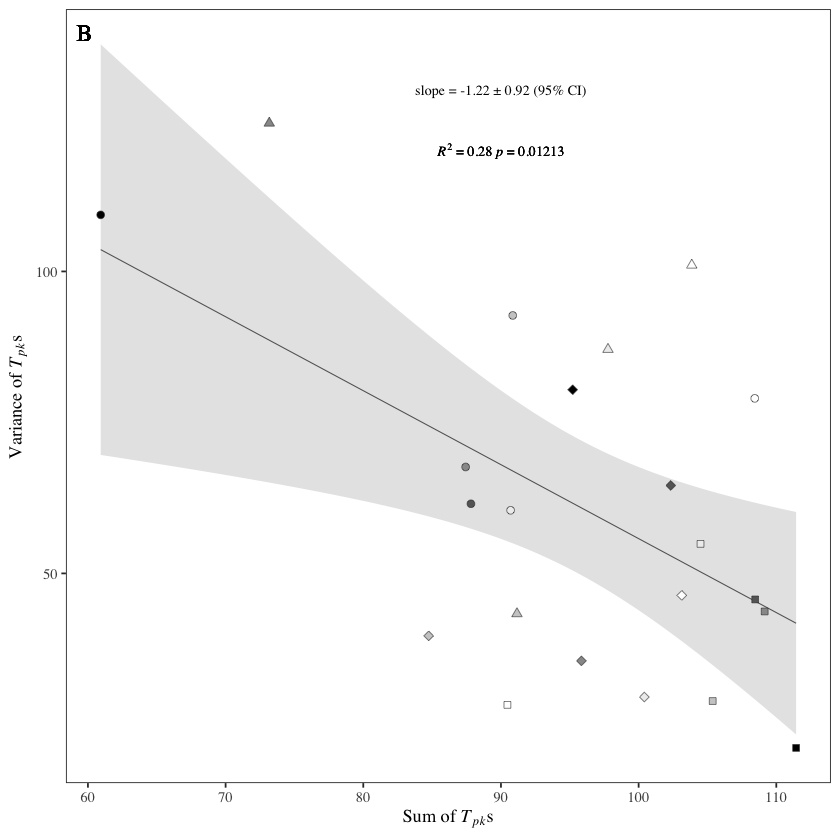

In [66]:
Sum_vs_Var_Tpks_plot <- PlotData %>%
  ggplot(aes(x = sum, y = variance))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("Variance of ",italic("T"[pk]),"s"))))+
  scale_x_continuous(expression(plain(paste("Sum of ",italic("T"[pk]),"s"))))+
  geom_point(aes(shape=species, fill=species), size=2, stroke=0.25, col='#333333')+
  scale_shape_manual(values = c(21,21,21,21,21,21,
                                22,22,22,22,22,22,
                                23,23,23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=11,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF", "#EEEEEE","#CCCCCC","#999999"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=11,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=11,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=11),
        legend.position = 'none',
        legend.text = element_text(size = 4.5, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'))+
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.7, vjust=2,
                label = "B"), size = 5, colour = "black", family='Times')+
  theme(axis.title.y = element_text(hjust=0.5), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
annotate("text", x = 90, y = 120, label = italic("R")^2~"= 0.28"~italic("p")~"= 0.01213", size=3, family='Times')+
annotate("text", x = 90, y = 130, label = "slope = -1.22 ± 0.92 (95% CI)", size=3, family='Times')

Sum_vs_Var_Tpks_plot


`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


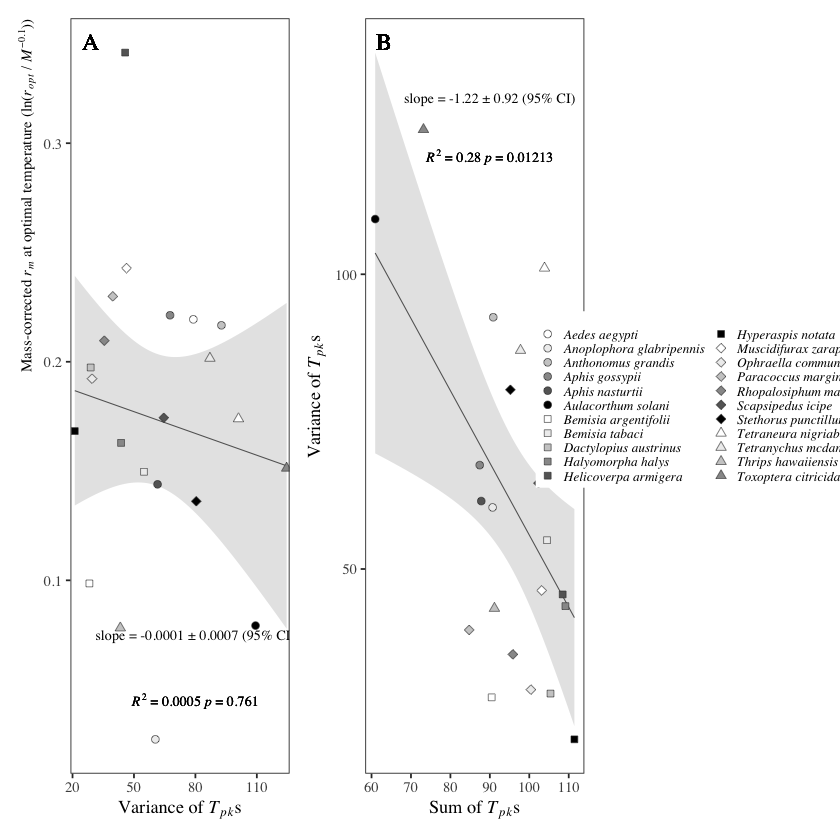

In [67]:
legendz <- get_legend(Sum_vs_Var_Tpks_plot + theme(legend.position = c(0.515,0.525), 
                                                   legend.text = element_text(size = 8, face = 'italic')))

rm_vs_Var_and_Sum <- (Var_rm+Sum_vs_Var_Tpks_plot+legendz)
rm_vs_Var_and_Sum



save_plot(rm_vs_Var_and_Sum, file= "../results/SI/rm_vs_Var_and_Sum.pdf",
          base_height=8.5, base_width = 25, base_asp = 1, units="cm")
